<a href="https://colab.research.google.com/github/Bluestars1/BMI520-Autism-Genes/blob/main/Final_BMI_520_on_Autism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
import numpy as np
from itertools import chain
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import statsmodels.api as sm
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

# **Import Files**

In [2]:
genes = "https://github.com/Bluestars1/BMI520-Autism-Genes/blob/main/SFARIGenes.xls?raw=true"
disorders = "https://github.com/Bluestars1/BMI520-Autism-Genes/blob/main/SfariDisorders.xls?raw=true"
disease_assoc = "https://github.com/Bluestars1/BMI520-Autism-Genes/blob/main/all_gene_disease_associations.xls?raw=true"
mapped_genes = "https://github.com/Bluestars1/BMI520-Autism-Genes/blob/main/MappedGenesToPanther.xlsx?raw=true"
pathways = "https://github.com/Bluestars1/BMI520-Autism-Genes/blob/main/keggpathways.csv?raw=true"
cleanedpaths = "https://github.com/Bluestars1/BMI520-Autism-Genes/blob/main/KeggPaths.xlsx?raw=true"

# **Bring in the Genes from SFARI and get gene scores related to autism - 1 & 2**

File: readdfgenes

In [3]:
#read SfariGenes Gene for scores 1 and 2 related to autism 
readdfgenes = pd.read_excel(genes)


In [4]:
# print columns
print (readdfgenes.columns)
# Convert the dictionary into DataFrame 
dfgenes = pd.DataFrame(data = readdfgenes)
# Remove columns
dfgenes = dfgenes.drop(['status', 'syndromic', 'number-of-reports', 'genetic-category'], axis = 1)
#display dfgenes data set to work with
display(dfgenes)

Index(['status', 'gene-symbol', 'gene-name', 'ensembl-id', 'chromosome',
       'genetic-category', 'gene-score', 'syndromic', 'number-of-reports'],
      dtype='object')


,gene-symbol,gene-name,ensembl-id,chromosome,gene-score
0,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,3.0
1,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,3.0
2,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,3.0
3,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,3.0
4,ACE,angiotensin I converting enzyme,ENSG00000159640,17,3.0
...,...,...,...,...,...
998,ZMYND8,zinc finger MYND-type containing 8,ENSG00000101040,20,1.0
999,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,2.0
1000,ZNF827,Zinc finger protein 827,ENSG00000151612,4,3.0
1001,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,NaN


# **SAFARI Disorders associated autism and associated genes**

Need to be formated Gene,Disorder - to columns - one row for each

File is readdfdisorders

In [5]:
#read SfariDisorders file disorders associated with genes
readdfdisorders = pd.read_excel(disorders) 

In [6]:
#pd.DataFrame(data = df2)
#display
display(readdfdisorders)

,MDAG,Disorders,TotalDisorders
0,APOE,"Anxiety Disorder, Attention Deficit Hyperactiv...",12
1,BDNF,"Anxiety Disorder, Attention Deficit Hyperactiv...",12
2,SLC6A4,"Anxiety Disorder, Attention Deficit Hyperactiv...",12
3,ABCB1,"Anxiety Disorder, Attention Deficit Hyperactiv...",11
4,ADA,"Anxiety Disorder, Attention Deficit Hyperactiv...",11
...,...,...,...
705,USP9X,Intellectual Disability,1
706,WNK3,Intellectual Disability,1
707,XIRP2,Epilepsy,1
708,XPO1,Intellectual Disability,1


# **This does the formating of one row for each gene,disorder** Normalize the data

In [7]:
# return list from Disorder which is a series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split(',')))

# calculate lengths of splits
lens = readdfdisorders['Disorders'].str.split(',').map(len)

# create new dataframe, repeating Columns MDAG and Roral Disorders and  chaining
# Disorders to create new rows 1 MDAG -> Multiple Disorder-> TotalDisorders for 
# MDAG
res = pd.DataFrame({'MDAG': np.repeat(readdfdisorders['MDAG'],lens),
                    'Disorders':chainer(readdfdisorders['Disorders']),
                     'TotalDisorders':np.repeat(readdfdisorders['TotalDisorders'],lens)})
# Remove columns
dfdisorders = res.drop(['TotalDisorders'], axis = 1)
display(dfdisorders)

,MDAG,Disorders
0,APOE,Anxiety Disorder
0,APOE,Attention Deficit Hyperactivity Disorder
0,APOE,Bipolar Spectrum Disorders
0,APOE,Depressive Disorder
0,APOE,Down Syndrome
...,...,...
705,USP9X,Intellectual Disability
706,WNK3,Intellectual Disability
707,XIRP2,Epilepsy
708,XPO1,Intellectual Disability


**Start Merging tables 
First Gene with Disorders**

In [8]:
mergeGeneDisorders = pd.merge(dfgenes,dfdisorders, how='left', left_on=['gene-symbol'], right_on=['MDAG'])

In [9]:
display(mergeGeneDisorders)

,gene-symbol,gene-name,ensembl-id,chromosome,gene-score,MDAG,Disorders
0,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,3.0,ABAT,Epilepsy
1,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,3.0,ABAT,Schizophrenia
2,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,3.0,ABAT,Sleep Disorders
3,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,3.0,NaN,NaN
4,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,3.0,ABCA13,Attention Deficit Hyperactivity Disorder
...,...,...,...,...,...,...,...
1996,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,2.0,ZNF804A,Down Syndrome
1997,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,2.0,ZNF804A,Schizophrenia
1998,ZNF827,Zinc finger protein 827,ENSG00000151612,4,3.0,NaN,NaN
1999,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,NaN,NaN,NaN


 **Dropping Gene score 3 since not autism**

In [10]:
mergeGeneDisorders = mergeGeneDisorders.drop(mergeGeneDisorders[(mergeGeneDisorders['gene-score'] == 3.0)].index)

 **Get Rid of Nulls**

In [11]:
mod_dfGenes= mergeGeneDisorders.dropna()

In [12]:
display(mod_dfGenes)

,gene-symbol,gene-name,ensembl-id,chromosome,gene-score,MDAG,Disorders
20,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Anxiety Disorder
21,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Attention Deficit Hyperactivity Disorder
22,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Bipolar Spectrum Disorders
23,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Depressive Disorder
24,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Down Syndrome
...,...,...,...,...,...,...,...
1993,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,2.0,ZNF804A,Attention Deficit Hyperactivity Disorder
1994,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,2.0,ZNF804A,Bipolar Spectrum Disorders
1995,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,2.0,ZNF804A,Depressive Disorder
1996,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,2.0,ZNF804A,Down Syndrome


# **Sort by Disorders/Gene and gene-score**

In [13]:
mod_dfdisorders = mod_dfGenes.sort_values(by=['Disorders', 'MDAG', 'gene-score'])
display(mod_dfdisorders)

,gene-symbol,gene-name,ensembl-id,chromosome,gene-score,MDAG,Disorders
21,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Attention Deficit Hyperactivity Disorder
61,ALDH5A1,"aldehyde dehydrogenase 5 family, member A1 (su...",ENSG00000112294,6,1.0,ALDH5A1,Attention Deficit Hyperactivity Disorder
74,ANK3,ankyrin 3,ENSG00000151150,10,1.0,ANK3,Attention Deficit Hyperactivity Disorder
114,ASTN2,astrotactin 2,ENSG00000148219,9,2.0,ASTN2,Attention Deficit Hyperactivity Disorder
134,AUTS2,autism susceptibility candidate 2,ENSG00000158321,7,1.0,AUTS2,Attention Deficit Hyperactivity Disorder
...,...,...,...,...,...,...,...
1627,SHANK1,SH3 and multiple ankyrin repeat domains 1,ENSG00000161681,19,2.0,SHANK1,Schizophrenia
1742,SOX5,SRY-box 5,ENSG00000134532,12,1.0,SOX5,Schizophrenia
1878,TRPM1,transient receptor potential cation channel su...,ENSG00000134160,15,2.0,TRPM1,Schizophrenia
922,KATNAL2,Katanin p60 subunit A-like 2,ENSG00000167216,18,1.0,KATNAL2,Sleep Disorders


# **Bring in the Kegg Pathways from GSEA**

This data was cleaned like the disorders created path/gene and added the Pathway number andthe Number the gene is in that path

In [14]:
#read in the cleaned paths - path id plus number in path
readdfclpath = pd.read_excel(cleanedpaths)

In [15]:
display(readdfclpath)

,Path,Gene,NumberInPath,PathwayNumber
0,KEGG_N_GLYCAN_BIOSYNTHESIS,ALG13,1,1
1,KEGG_N_GLYCAN_BIOSYNTHESIS,DOLPP1,2,1
2,KEGG_N_GLYCAN_BIOSYNTHESIS,RPN1,3,1
3,KEGG_N_GLYCAN_BIOSYNTHESIS,ALG14,4,1
4,KEGG_N_GLYCAN_BIOSYNTHESIS,MAN1B1,5,1
...,...,...,...,...
12534,KEGG_VIRAL_MYOCARDITIS,MYH11,66,221
12535,KEGG_VIRAL_MYOCARDITIS,FYN,67,221
12536,KEGG_VIRAL_MYOCARDITIS,MYH10,68,221
12537,KEGG_VIRAL_MYOCARDITIS,HLA-DRB1,69,221


# **Lets merge Pathway file with Gene and disorders data**

Merge Gene and disorders

In [16]:
mergeall = pd.merge(mod_dfdisorders ,readdfclpath, how='left', left_on=['gene-symbol'], right_on=['Gene'])

In [17]:
display(mergeall)

,gene-symbol,gene-name,ensembl-id,chromosome,gene-score,MDAG,Disorders,Path,Gene,NumberInPath,PathwayNumber
0,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Attention Deficit Hyperactivity Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0
1,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Attention Deficit Hyperactivity Disorder,KEGG_HUNTINGTONS_DISEASE,ADA,71.0,45.0
2,ALDH5A1,"aldehyde dehydrogenase 5 family, member A1 (su...",ENSG00000112294,6,1.0,ALDH5A1,Attention Deficit Hyperactivity Disorder,KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,ALDH5A1,28.0,47.0
3,ALDH5A1,"aldehyde dehydrogenase 5 family, member A1 (su...",ENSG00000112294,6,1.0,ALDH5A1,Attention Deficit Hyperactivity Disorder,KEGG_BUTANOATE_METABOLISM,ALDH5A1,29.0,70.0
4,ANK3,ankyrin 3,ENSG00000151150,10,1.0,ANK3,Attention Deficit Hyperactivity Disorder,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1219,SHANK1,SH3 and multiple ankyrin repeat domains 1,ENSG00000161681,19,2.0,SHANK1,Schizophrenia,NaN,NaN,NaN,NaN
1220,SOX5,SRY-box 5,ENSG00000134532,12,1.0,SOX5,Schizophrenia,NaN,NaN,NaN,NaN
1221,TRPM1,transient receptor potential cation channel su...,ENSG00000134160,15,2.0,TRPM1,Schizophrenia,NaN,NaN,NaN,NaN
1222,KATNAL2,Katanin p60 subunit A-like 2,ENSG00000167216,18,1.0,KATNAL2,Sleep Disorders,NaN,NaN,NaN,NaN


## **Drop NA's**

In [18]:
dfdata= mergeall.dropna()

In [19]:
display(dfdata)

,gene-symbol,gene-name,ensembl-id,chromosome,gene-score,MDAG,Disorders,Path,Gene,NumberInPath,PathwayNumber
0,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Attention Deficit Hyperactivity Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0
1,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Attention Deficit Hyperactivity Disorder,KEGG_HUNTINGTONS_DISEASE,ADA,71.0,45.0
2,ALDH5A1,"aldehyde dehydrogenase 5 family, member A1 (su...",ENSG00000112294,6,1.0,ALDH5A1,Attention Deficit Hyperactivity Disorder,KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,ALDH5A1,28.0,47.0
3,ALDH5A1,"aldehyde dehydrogenase 5 family, member A1 (su...",ENSG00000112294,6,1.0,ALDH5A1,Attention Deficit Hyperactivity Disorder,KEGG_BUTANOATE_METABOLISM,ALDH5A1,29.0,70.0
7,CACNA1C,"calcium channel, voltage-dependent, L type, al...",ENSG00000151067,12,1.0,CACNA1C,Attention Deficit Hyperactivity Disorder,KEGG_DILATED_CARDIOMYOPATHY,CACNA1C,39.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...
1210,MET,met proto-oncogene (hepatocyte growth factor r...,ENSG00000105976,7,2.0,MET,Schizophrenia,KEGG_RENAL_CELL_CARCINOMA,MET,507.0,208.0
1211,MET,met proto-oncogene (hepatocyte growth factor r...,ENSG00000105976,7,2.0,MET,Schizophrenia,KEGG_MELANOMA,MET,51.0,214.0
1216,ROBO2,roundabout guidance receptor 2,ENSG00000185008,3,2.0,ROBO2,Schizophrenia,KEGG_AXON_GUIDANCE,ROBO2,16.0,115.0
1217,SEMA5A,"sema domain, seven thrombospondin repeats (typ...",ENSG00000112902,5,2.0,SEMA5A,Schizophrenia,KEGG_AXON_GUIDANCE,SEMA5A,58.0,115.0


**Remove unecessary columns**

In [20]:
dfdatanew = dfdata.drop(['MDAG', 'gene-symbol'], axis = 1)

In [21]:
dfdatanew.head()

,gene-name,ensembl-id,chromosome,gene-score,Disorders,Path,Gene,NumberInPath,PathwayNumber
0,adenosine deaminase,ENSG00000196839,20,2.0,Attention Deficit Hyperactivity Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0
1,adenosine deaminase,ENSG00000196839,20,2.0,Attention Deficit Hyperactivity Disorder,KEGG_HUNTINGTONS_DISEASE,ADA,71.0,45.0
2,"aldehyde dehydrogenase 5 family, member A1 (su...",ENSG00000112294,6,1.0,Attention Deficit Hyperactivity Disorder,KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,ALDH5A1,28.0,47.0
3,"aldehyde dehydrogenase 5 family, member A1 (su...",ENSG00000112294,6,1.0,Attention Deficit Hyperactivity Disorder,KEGG_BUTANOATE_METABOLISM,ALDH5A1,29.0,70.0
7,"calcium channel, voltage-dependent, L type, al...",ENSG00000151067,12,1.0,Attention Deficit Hyperactivity Disorder,KEGG_DILATED_CARDIOMYOPATHY,CACNA1C,39.0,24.0


# **Plot the Data**

# **Hist Plot**

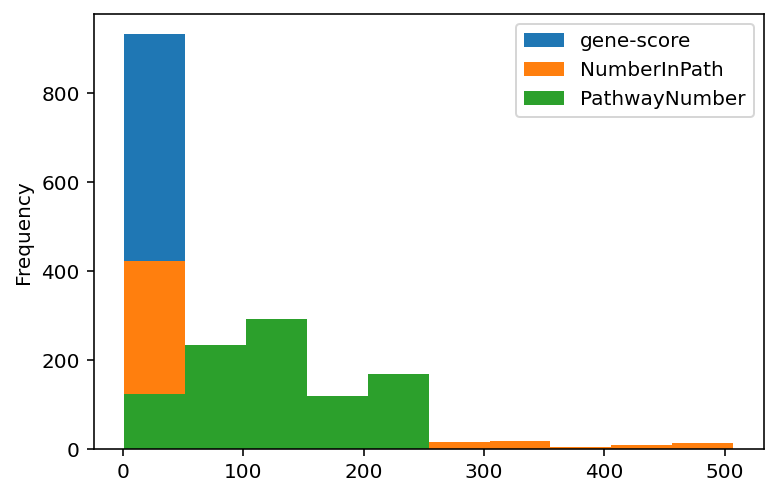

In [22]:
dfdatanew.plot.hist()

# **Scatter Plot**

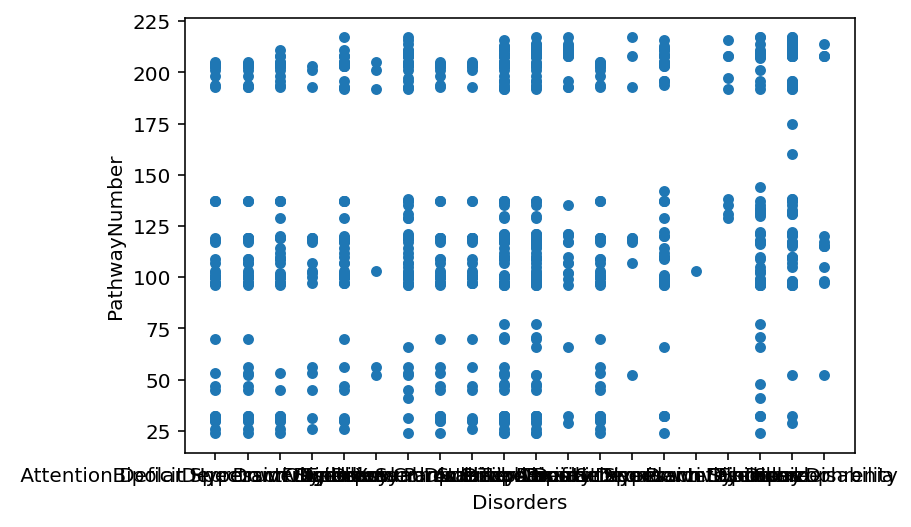

In [23]:
dfdatanew.plot.scatter(x='Disorders',y='PathwayNumber')

# **Seaborn Bar Plot**

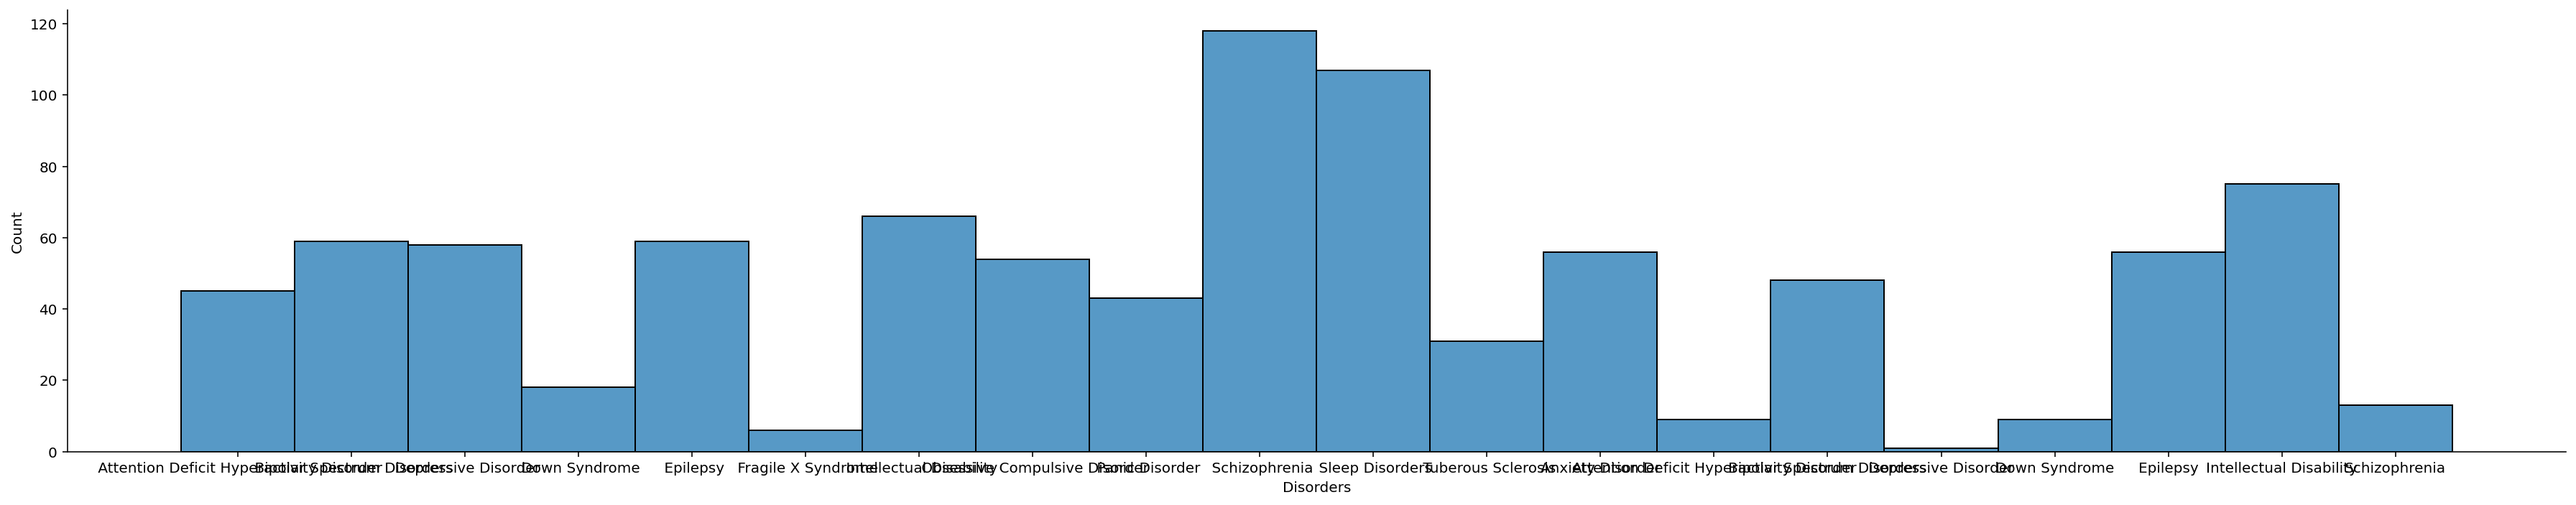

In [24]:
sns.displot(data=dfdatanew, x="Disorders", aspect=5)

**KDE plot is a probability density function that generates the data by binning and counting observations**

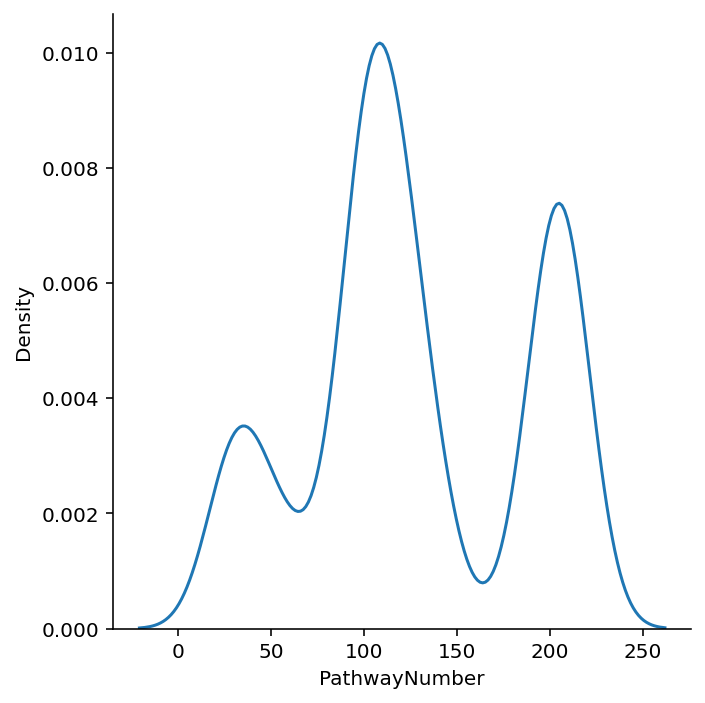

In [25]:
sns.displot(dfdatanew, x="PathwayNumber", kind="kde")

**testing** this out - group by Path and count - just playing 

In [26]:
test = dfdatanew.groupby(['Path']).agg(['count'])

In [27]:
test.head(5)

,gene-name,ensembl-id,chromosome,gene-score,Disorders,Gene,NumberInPath,PathwayNumber
,count,count,count,count,count,count,count,count
Path,,,,,,,,
KEGG_ACUTE_MYELOID_LEUKEMIA,17,17,17,17,17,17,17,17
KEGG_ADHERENS_JUNCTION,14,14,14,14,14,14,14,14
KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY,10,10,10,10,10,10,10,10
KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,8,8,8,8,8,8,8,8
KEGG_ALDOSTERONE_REGULATED_SODIUM_REABSORPTION,19,19,19,19,19,19,19,19


# **See which Disorders are unique - seem to have dups - was due to a space in the first position**

In [28]:
sorted(dfdatanew.Disorders.unique())

[' Attention Deficit Hyperactivity Disorder',
 ' Bipolar Spectrum Disorders',
 ' Depressive Disorder',
 ' Down Syndrome',
 ' Epilepsy',
 ' Fragile X Syndrome',
 ' Intellectual Disability',
 ' Obsessive Compulsive Disorder',
 ' Panic Disorder',
 ' Schizophrenia',
 ' Sleep Disorders',
 ' Tuberous Sclerosis',
 'Anxiety Disorder',
 'Attention Deficit Hyperactivity Disorder',
 'Bipolar Spectrum Disorders',
 'Depressive Disorder',
 'Down Syndrome',
 'Epilepsy',
 'Intellectual Disability',
 'Schizophrenia']

**Playing around with Plots trying to make sense of the data**

Playing around with Plots trying to make sense of the data

In [30]:
pd.set_option('display.max_rows', 10)

In [31]:
display(dfdatanew)

,gene-name,ensembl-id,chromosome,gene-score,Disorders,Path,Gene,NumberInPath,PathwayNumber
0,adenosine deaminase,ENSG00000196839,20,2.0,Attention Deficit Hyperactivity Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0
1,adenosine deaminase,ENSG00000196839,20,2.0,Attention Deficit Hyperactivity Disorder,KEGG_HUNTINGTONS_DISEASE,ADA,71.0,45.0
2,"aldehyde dehydrogenase 5 family, member A1 (su...",ENSG00000112294,6,1.0,Attention Deficit Hyperactivity Disorder,KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,ALDH5A1,28.0,47.0
3,"aldehyde dehydrogenase 5 family, member A1 (su...",ENSG00000112294,6,1.0,Attention Deficit Hyperactivity Disorder,KEGG_BUTANOATE_METABOLISM,ALDH5A1,29.0,70.0
7,"calcium channel, voltage-dependent, L type, al...",ENSG00000151067,12,1.0,Attention Deficit Hyperactivity Disorder,KEGG_DILATED_CARDIOMYOPATHY,CACNA1C,39.0,24.0
...,...,...,...,...,...,...,...,...,...
1210,met proto-oncogene (hepatocyte growth factor r...,ENSG00000105976,7,2.0,Schizophrenia,KEGG_RENAL_CELL_CARCINOMA,MET,507.0,208.0
1211,met proto-oncogene (hepatocyte growth factor r...,ENSG00000105976,7,2.0,Schizophrenia,KEGG_MELANOMA,MET,51.0,214.0
1216,roundabout guidance receptor 2,ENSG00000185008,3,2.0,Schizophrenia,KEGG_AXON_GUIDANCE,ROBO2,16.0,115.0
1217,"sema domain, seven thrombospondin repeats (typ...",ENSG00000112902,5,2.0,Schizophrenia,KEGG_AXON_GUIDANCE,SEMA5A,58.0,115.0


# **BMC - gene disease associated with autism number of Snips**

File: dfdisease

**# genomics listing of all gene disease associations**

In [32]:
dfdisease = pd.read_excel(disease_assoc)

In [33]:
print (dfdisease.columns)

Index(['geneId', 'geneSymbol', 'DSI', 'DPI', 'diseaseId', 'diseaseName',
       'diseaseType', 'diseaseClass', 'diseaseSemanticType', 'score', 'EI',
       'YearInitial', 'YearFinal', 'NofPmids', 'NofSnps', 'source'],
      dtype='object')


In [34]:
# Convert the dictionary into DataFrame 
dfdisease = pd.DataFrame(data = dfdisease)
# Remove columns
dfdisease = dfdisease.drop(['DSI','DPI','diseaseId','diseaseClass', 'diseaseSemanticType', 'score', 'EI','YearInitial','YearFinal','NofPmids','source'], axis = 1)
#dfdisease = dfdisease.drop(['diseaseClass', 'diseaseSemanticType', 'score', 'EI','YearInitial','YearFinal','NofPmids','source','DSI','DPI','diseaseID'], axis = 1)
#display
display(dfdisease)

,geneId,geneSymbol,diseaseName,diseaseType,NofSnps
0,1,A1BG,Adenocarcinoma,group,0
1,1,A1BG,Amyotrophic Lateral Sclerosis,disease,0
2,1,A1BG,Apnea,phenotype,0
3,1,A1BG,Arthritis,disease,0
4,1,A1BG,Cholesteatoma,disease,0
...,...,...,...,...,...
65530,673,BRAF,Anaplastic carcinoma,disease,2
65531,673,BRAF,Undifferentiated carcinoma,disease,2
65532,673,BRAF,Dysplastic Nevus,disease,2
65533,673,BRAF,Subependymal Giant Cell Astrocytoma,disease,2


In [35]:
mergeall= mergeall.dropna()

In [36]:
display(mergeall)

,gene-symbol,gene-name,ensembl-id,chromosome,gene-score,MDAG,Disorders,Path,Gene,NumberInPath,PathwayNumber
0,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Attention Deficit Hyperactivity Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0
1,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Attention Deficit Hyperactivity Disorder,KEGG_HUNTINGTONS_DISEASE,ADA,71.0,45.0
2,ALDH5A1,"aldehyde dehydrogenase 5 family, member A1 (su...",ENSG00000112294,6,1.0,ALDH5A1,Attention Deficit Hyperactivity Disorder,KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,ALDH5A1,28.0,47.0
3,ALDH5A1,"aldehyde dehydrogenase 5 family, member A1 (su...",ENSG00000112294,6,1.0,ALDH5A1,Attention Deficit Hyperactivity Disorder,KEGG_BUTANOATE_METABOLISM,ALDH5A1,29.0,70.0
7,CACNA1C,"calcium channel, voltage-dependent, L type, al...",ENSG00000151067,12,1.0,CACNA1C,Attention Deficit Hyperactivity Disorder,KEGG_DILATED_CARDIOMYOPATHY,CACNA1C,39.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...
1210,MET,met proto-oncogene (hepatocyte growth factor r...,ENSG00000105976,7,2.0,MET,Schizophrenia,KEGG_RENAL_CELL_CARCINOMA,MET,507.0,208.0
1211,MET,met proto-oncogene (hepatocyte growth factor r...,ENSG00000105976,7,2.0,MET,Schizophrenia,KEGG_MELANOMA,MET,51.0,214.0
1216,ROBO2,roundabout guidance receptor 2,ENSG00000185008,3,2.0,ROBO2,Schizophrenia,KEGG_AXON_GUIDANCE,ROBO2,16.0,115.0
1217,SEMA5A,"sema domain, seven thrombospondin repeats (typ...",ENSG00000112902,5,2.0,SEMA5A,Schizophrenia,KEGG_AXON_GUIDANCE,SEMA5A,58.0,115.0


# Get with more than 1 **snp non have any snps - suspicous - more research is needed**

In [ ]:
mergeall.head()

** Panther - enter genes get disease associated with autism**
**NOT USING**
File: dfmappedpanther

In [ ]:
#dfmappedpanther = pd.read_excel(mapped_genes)- may not use file

In [ ]:
# print columns
#print (dfmappedpanther.columns)
# Convert the dictionary into DataFrame 
#dfmappedpanther = pd.DataFrame(data = dfmappedpanther)
# Remove columns
#dfdisease = diseasesdf.drop(['diseaseClass', 'diseaseSemanticType', 'score', 'EI','YearInitial','YearFinal','NofPmids','source'], axis = 1)
#display
#display(dfmappedpanther)

**Bring in the Kegg Pathways from GSEA**

This data was cleaned like the diordors created path/gene and added Pathway number and Numer in path

In [ ]:
#genedisorderpaths = pd.merge(mergeGeneDisorders ,cleanedpaths, how='left', left_on=['gene-symbol'], right_on=['MppedID'])

In [50]:
#read in the cleaned paths - path id plus number in path
readdfclpath = pd.read_excel(cleanedpaths) 

In [51]:
display(readdfclpath)

,Path,Gene,NumberInPath,PathwayNumber
0,KEGG_N_GLYCAN_BIOSYNTHESIS,ALG13,1,1
1,KEGG_N_GLYCAN_BIOSYNTHESIS,DOLPP1,2,1
2,KEGG_N_GLYCAN_BIOSYNTHESIS,RPN1,3,1
3,KEGG_N_GLYCAN_BIOSYNTHESIS,ALG14,4,1
4,KEGG_N_GLYCAN_BIOSYNTHESIS,MAN1B1,5,1
...,...,...,...,...
12534,KEGG_VIRAL_MYOCARDITIS,MYH11,66,221
12535,KEGG_VIRAL_MYOCARDITIS,FYN,67,221
12536,KEGG_VIRAL_MYOCARDITIS,MYH10,68,221
12537,KEGG_VIRAL_MYOCARDITIS,HLA-DRB1,69,221


# **Merge Paths with Genesd***

In [52]:
mergegenddisorderspath = pd.merge(mod_dfGenes,readdfclpath, how='left', left_on=['gene-symbol'], right_on=['Gene'])

In [53]:
mergegenddisorderspath['Disorders'].unique()

array(['Anxiety Disorder', ' Attention Deficit Hyperactivity Disorder',
       ' Bipolar Spectrum Disorders', ' Depressive Disorder',
       ' Down Syndrome', ' Epilepsy', ' Intellectual Disability',
       ' Obsessive Compulsive Disorder', ' Panic Disorder',
       ' Schizophrenia', ' Sleep Disorders', 'Fragile X Syndrome',
       'Epilepsy', 'Bipolar Spectrum Disorders',
       'Intellectual Disability', ' Fragile X Syndrome', 'Schizophrenia',
       ' Tuberous Sclerosis', 'Down Syndrome',
       'Attention Deficit Hyperactivity Disorder', 'Sleep Disorders',
       'Depressive Disorder'], dtype=object)

In [54]:
mergegenddisorderspath.head(10)


,gene-symbol,gene-name,ensembl-id,chromosome,gene-score,MDAG,Disorders,Path,Gene,NumberInPath,PathwayNumber
0,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Anxiety Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0
1,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Anxiety Disorder,KEGG_HUNTINGTONS_DISEASE,ADA,71.0,45.0
2,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Attention Deficit Hyperactivity Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0
3,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Attention Deficit Hyperactivity Disorder,KEGG_HUNTINGTONS_DISEASE,ADA,71.0,45.0
4,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Bipolar Spectrum Disorders,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0
5,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Bipolar Spectrum Disorders,KEGG_HUNTINGTONS_DISEASE,ADA,71.0,45.0
6,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Depressive Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0
7,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Depressive Disorder,KEGG_HUNTINGTONS_DISEASE,ADA,71.0,45.0
8,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Down Syndrome,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0
9,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Down Syndrome,KEGG_HUNTINGTONS_DISEASE,ADA,71.0,45.0


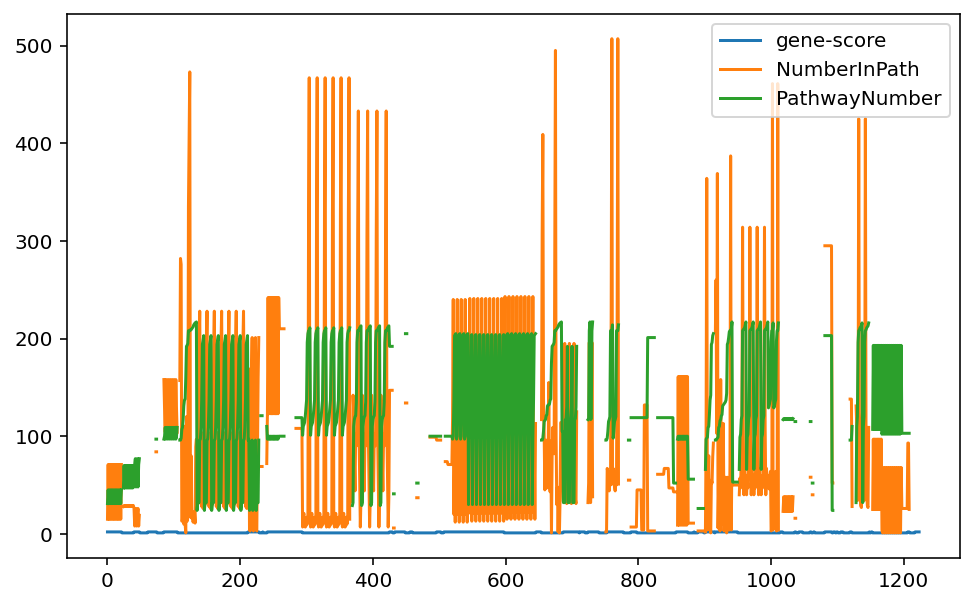

In [55]:
mergegenddisorderspath.plot(figsize=(8,5))

In [56]:
df = mergegenddisorderspath.sort_index(inplace=True)
#df['Disorders']

In [57]:
#sns.distplot(mergegenddisorderspath.Path)

In [58]:
#calculate cross correlation
#sm.tsa.stattools.ccf(Path, Disorders, adjusted=False)

In [59]:
 mergegenddisorderspath['Disordercount'] = mergegenddisorderspath.groupby('Path')['Disorders'].transform('count')

In [ ]:
#df1= mergegenddisorderspath.groupby(['Count'])['Disorders'].count().reset_index()

In [60]:
df = mergegenddisorderspath[(mergegenddisorderspath['NumberInPath'] < 20.0)]

In [61]:
df.head(20)

,gene-symbol,gene-name,ensembl-id,chromosome,gene-score,MDAG,Disorders,Path,Gene,NumberInPath,PathwayNumber,Disordercount
0,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Anxiety Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0,16.0
2,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Attention Deficit Hyperactivity Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0,16.0
4,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Bipolar Spectrum Disorders,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0,16.0
6,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Depressive Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0,16.0
8,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Down Syndrome,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...
47,AMT,Aminomethyltransferase,ENSG00000145020,3,2.0,AMT,Sleep Disorders,KEGG_ONE_CARBON_POOL_BY_FOLATE,AMT,8.0,71.0,3.0
48,AMT,Aminomethyltransferase,ENSG00000145020,3,2.0,AMT,Sleep Disorders,KEGG_NITROGEN_METABOLISM,AMT,19.0,77.0,3.0
112,BRAF,v-raf murine sarcoma viral oncogene homolog B,ENSG00000157764,7,1.0,BRAF,Intellectual Disability,KEGG_MTOR_SIGNALING_PATHWAY,BRAF,13.0,107.0,18.0
113,BRAF,v-raf murine sarcoma viral oncogene homolog B,ENSG00000157764,7,1.0,BRAF,Intellectual Disability,KEGG_MELANOGENESIS,BRAF,14.0,109.0,81.0


In [62]:
mergegenddisorderspath.head(20)

,gene-symbol,gene-name,ensembl-id,chromosome,gene-score,MDAG,Disorders,Path,Gene,NumberInPath,PathwayNumber,Disordercount
0,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Anxiety Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0,16.0
1,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Anxiety Disorder,KEGG_HUNTINGTONS_DISEASE,ADA,71.0,45.0,33.0
2,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Attention Deficit Hyperactivity Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0,16.0
3,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Attention Deficit Hyperactivity Disorder,KEGG_HUNTINGTONS_DISEASE,ADA,71.0,45.0,33.0
4,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Bipolar Spectrum Disorders,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Obsessive Compulsive Disorder,KEGG_HUNTINGTONS_DISEASE,ADA,71.0,45.0,33.0
16,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Panic Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0,16.0
17,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Panic Disorder,KEGG_HUNTINGTONS_DISEASE,ADA,71.0,45.0,33.0
18,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Schizophrenia,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0,16.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4958d6590>,
      dtype=object)

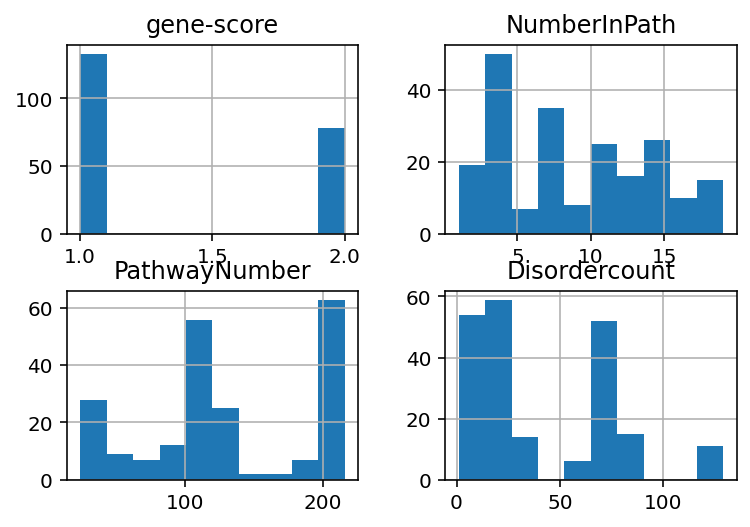

In [65]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4a4b71290>,
      dtype=object)

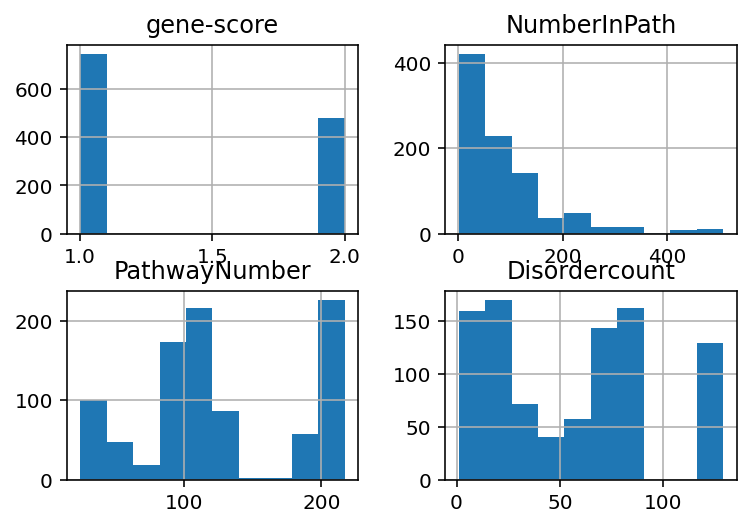

In [64]:
mergegenddisorderspath.hist()

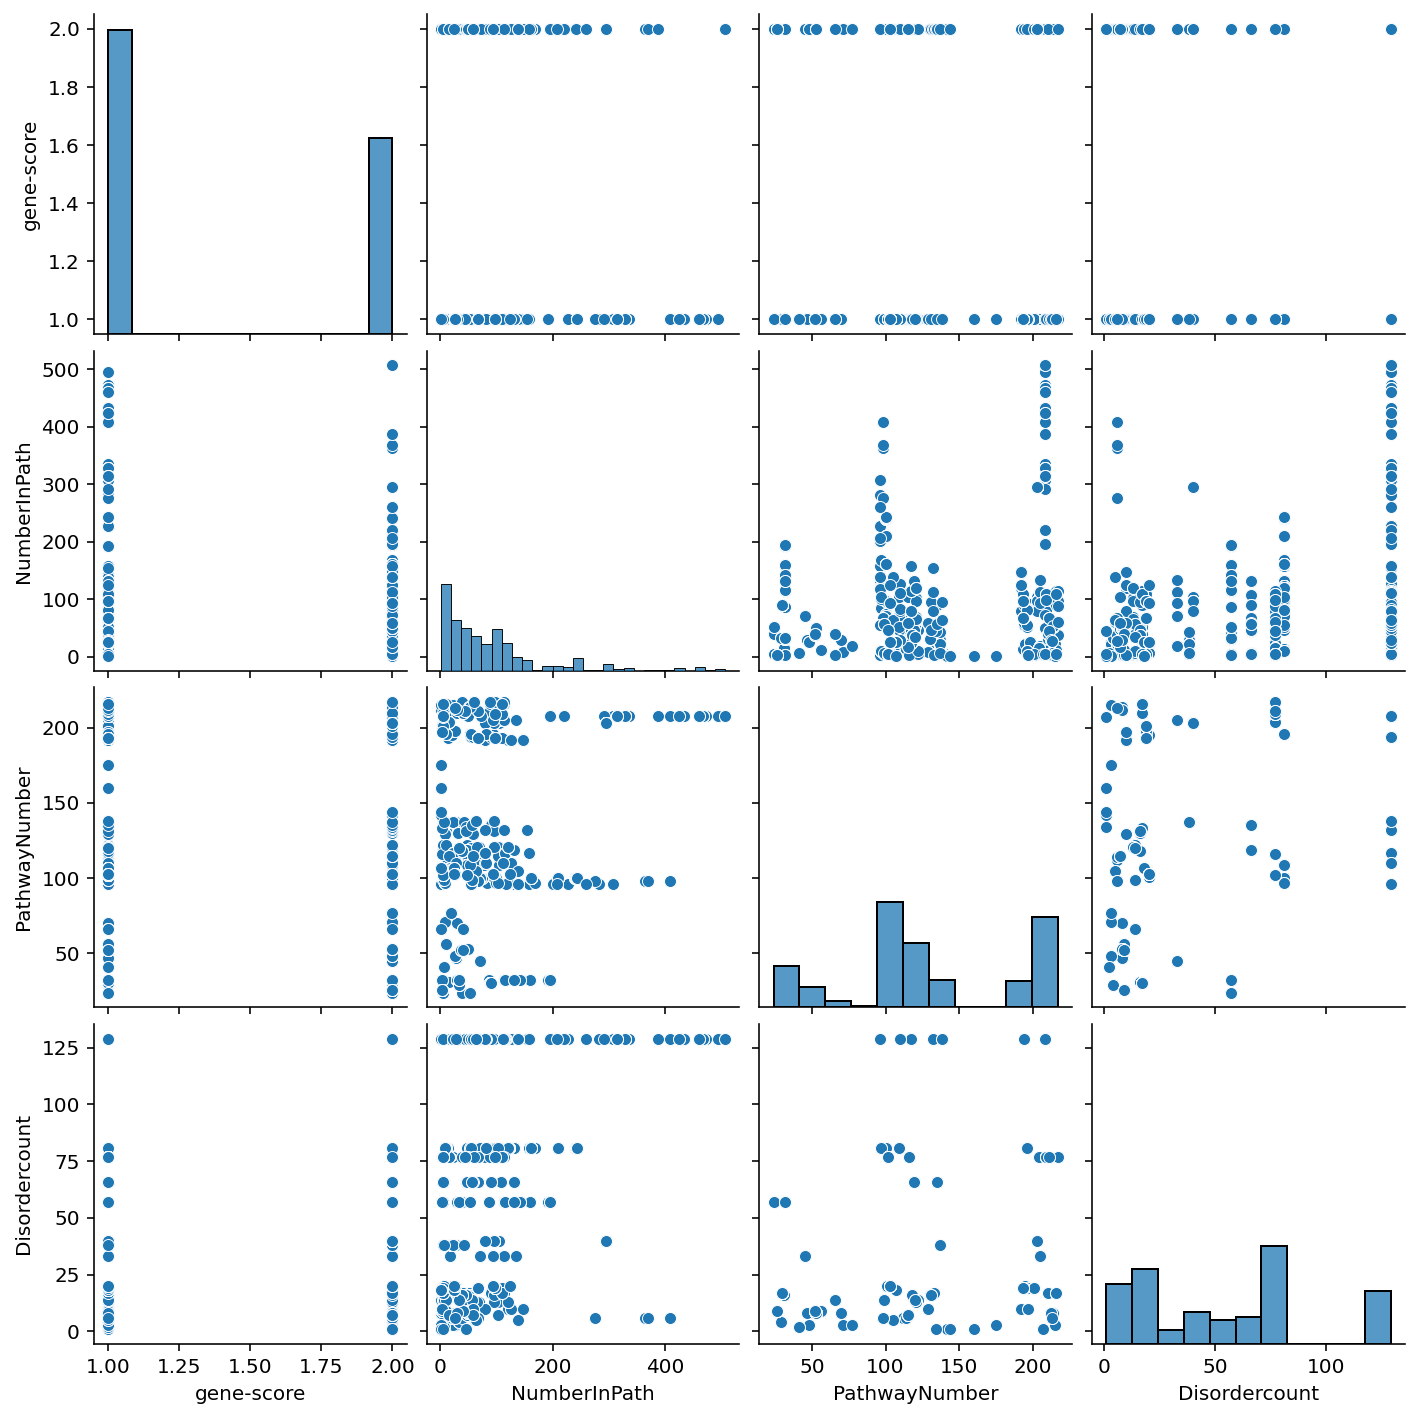

In [67]:
sns.pairplot(mergegenddisorderspath)

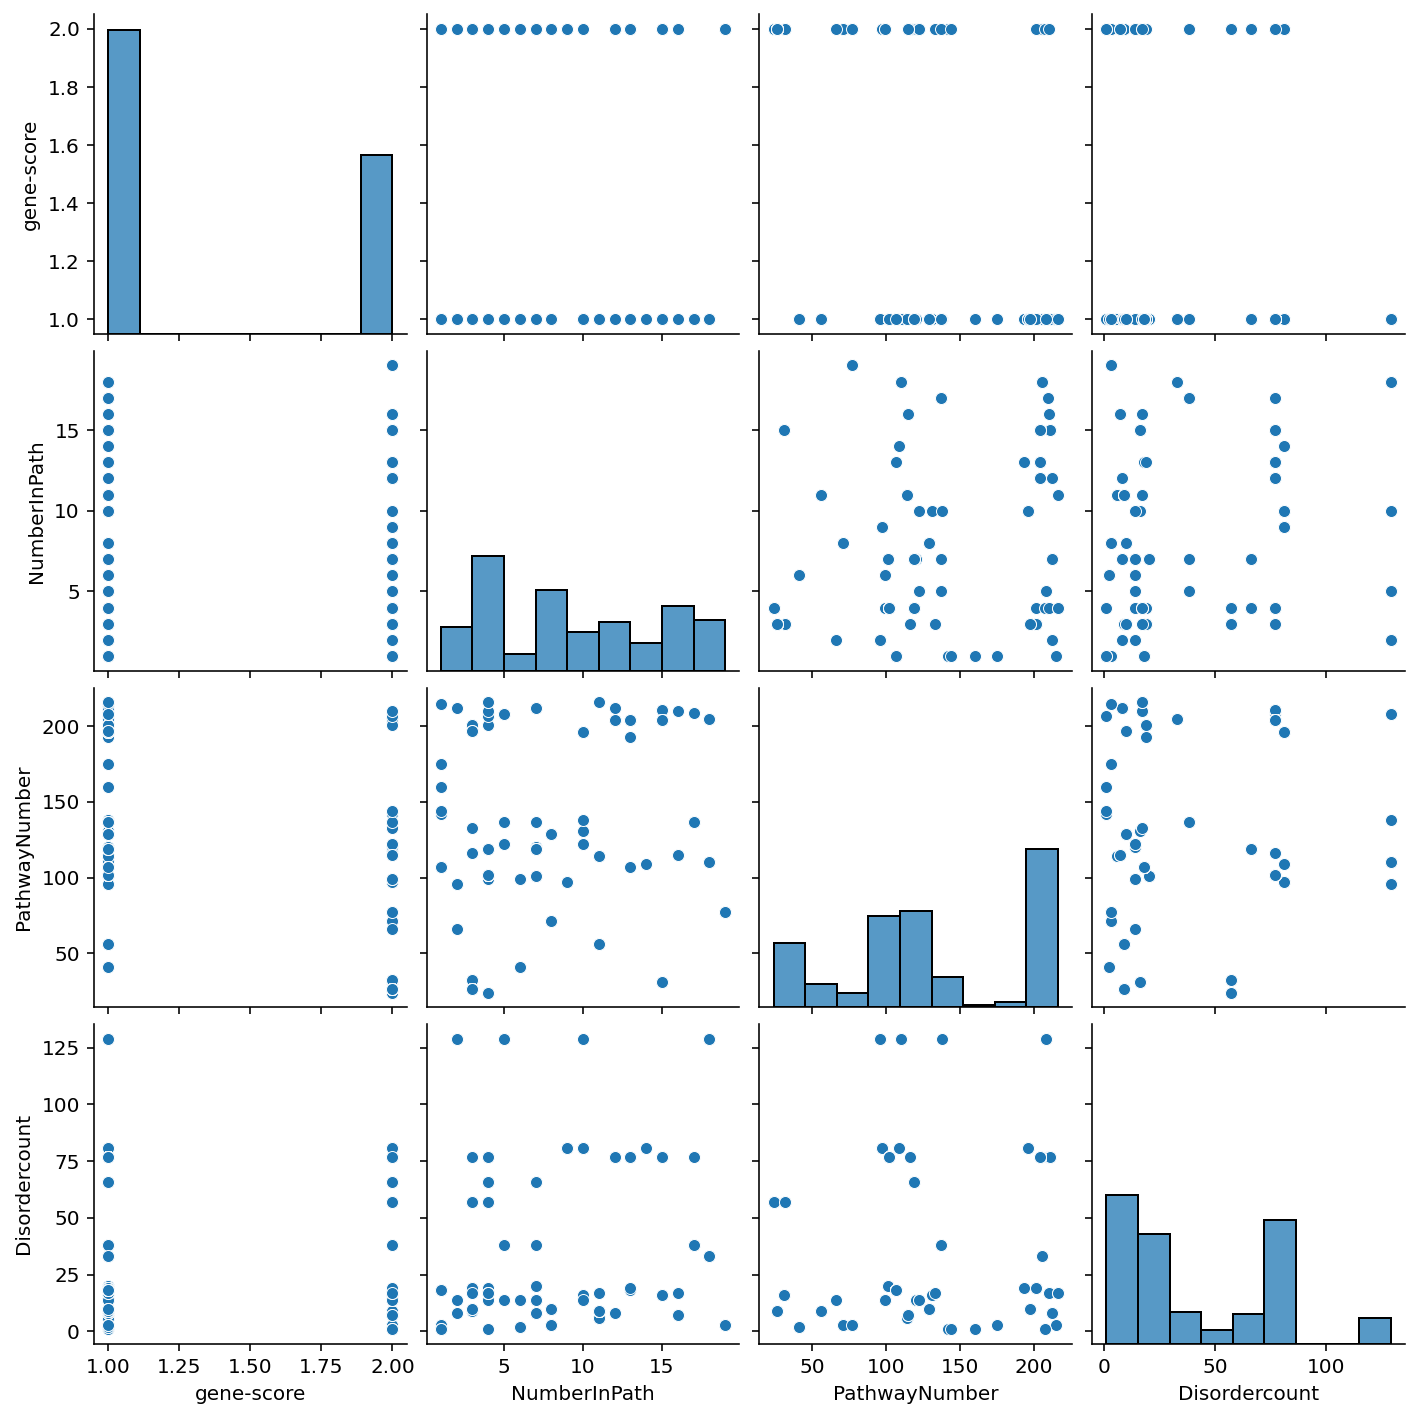

In [68]:
sns.pairplot(df)
plt.show()

In [70]:
pivotTable = pd.pivot_table(df, index=['Path', 'Gene'])

# **Create pivot table to view by path/gene/counts**

In [71]:
pivotTable.head(20)

Disordercount  ...  gene-score
Path                                      Gene                   ...            
KEGG_ACUTE_MYELOID_LEUKEMIA               BRAF             17.0  ...         1.0
                                          PRKCB            17.0  ...         2.0
                                          PTPN11           17.0  ...         1.0
KEGG_ADHERENS_JUNCTION                    CREBBP           14.0  ...         1.0
KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY      CREBBP           10.0  ...         1.0
...                                                         ...  ...         ...
KEGG_HUNTINGTONS_DISEASE                  CREBBP           33.0  ...         1.0
KEGG_INSULIN_SIGNALING_PATHWAY            BRAF             19.0  ...         1.0
KEGG_LEUKOCYTE_TRANSENDOTHELIAL_MIGRATION NLGN1            66.0  ...         2.0
                                          NLGN3            66.0  ...         1.0
KEGG_LONG_TERM_DEPRESSION                 CREBBP           38.0  ...         1.0

[20 rows x 4 columns]

In [76]:
mod_dfpaths = readdfclpath.sort_values(by=['Path', 'Gene'])

In [77]:
dfpathgenecount = readdfclpath.sort_values(by=['Gene'])
display(dfpathgenecount)

,Path,Gene,NumberInPath,PathwayNumber
7669,KEGG_COMPLEMENT_AND_COAGULATION_CASCADES,A2M,23,123
483,KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GLOBO_SERIES,A4GALT,1,15
2988,KEGG_BUTANOATE_METABOLISM,AACS,1,70
2590,KEGG_TRYPTOPHAN_METABOLISM,AADAT,38,57
2404,KEGG_LYSINE_DEGRADATION,AADAT,39,52
...,...,...,...,...
6594,KEGG_HEDGEHOG_SIGNALING_PATHWAY,ZIC2,6,113
3759,KEGG_SPLICEOSOME,ZMAT2,73,88
5624,KEGG_VIRAL_MYOCARDITIS,ZMAT3,9,102
9182,KEGG_RENAL_CELL_CARCINOMA,ZNF274,118,138


# **Lets merge Pathway file with Gene and disorders data**

Merge Gene and disorders

In [78]:
mergeall = pd.merge(mod_dfdisorders ,readdfclpath, how='left', left_on=['gene-symbol'], right_on=['Gene'])

In [79]:
display(mergeall)

,gene-symbol,gene-name,ensembl-id,chromosome,gene-score,MDAG,Disorders,Path,Gene,NumberInPath,PathwayNumber
0,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Attention Deficit Hyperactivity Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0
1,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Attention Deficit Hyperactivity Disorder,KEGG_HUNTINGTONS_DISEASE,ADA,71.0,45.0
2,ALDH5A1,"aldehyde dehydrogenase 5 family, member A1 (su...",ENSG00000112294,6,1.0,ALDH5A1,Attention Deficit Hyperactivity Disorder,KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,ALDH5A1,28.0,47.0
3,ALDH5A1,"aldehyde dehydrogenase 5 family, member A1 (su...",ENSG00000112294,6,1.0,ALDH5A1,Attention Deficit Hyperactivity Disorder,KEGG_BUTANOATE_METABOLISM,ALDH5A1,29.0,70.0
4,ANK3,ankyrin 3,ENSG00000151150,10,1.0,ANK3,Attention Deficit Hyperactivity Disorder,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1219,SHANK1,SH3 and multiple ankyrin repeat domains 1,ENSG00000161681,19,2.0,SHANK1,Schizophrenia,NaN,NaN,NaN,NaN
1220,SOX5,SRY-box 5,ENSG00000134532,12,1.0,SOX5,Schizophrenia,NaN,NaN,NaN,NaN
1221,TRPM1,transient receptor potential cation channel su...,ENSG00000134160,15,2.0,TRPM1,Schizophrenia,NaN,NaN,NaN,NaN
1222,KATNAL2,Katanin p60 subunit A-like 2,ENSG00000167216,18,1.0,KATNAL2,Sleep Disorders,NaN,NaN,NaN,NaN


In [80]:
dfdata= mergeall.dropna()

In [81]:
display(dfdata)

,gene-symbol,gene-name,ensembl-id,chromosome,gene-score,MDAG,Disorders,Path,Gene,NumberInPath,PathwayNumber
0,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Attention Deficit Hyperactivity Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0
1,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Attention Deficit Hyperactivity Disorder,KEGG_HUNTINGTONS_DISEASE,ADA,71.0,45.0
2,ALDH5A1,"aldehyde dehydrogenase 5 family, member A1 (su...",ENSG00000112294,6,1.0,ALDH5A1,Attention Deficit Hyperactivity Disorder,KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,ALDH5A1,28.0,47.0
3,ALDH5A1,"aldehyde dehydrogenase 5 family, member A1 (su...",ENSG00000112294,6,1.0,ALDH5A1,Attention Deficit Hyperactivity Disorder,KEGG_BUTANOATE_METABOLISM,ALDH5A1,29.0,70.0
7,CACNA1C,"calcium channel, voltage-dependent, L type, al...",ENSG00000151067,12,1.0,CACNA1C,Attention Deficit Hyperactivity Disorder,KEGG_DILATED_CARDIOMYOPATHY,CACNA1C,39.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...
1210,MET,met proto-oncogene (hepatocyte growth factor r...,ENSG00000105976,7,2.0,MET,Schizophrenia,KEGG_RENAL_CELL_CARCINOMA,MET,507.0,208.0
1211,MET,met proto-oncogene (hepatocyte growth factor r...,ENSG00000105976,7,2.0,MET,Schizophrenia,KEGG_MELANOMA,MET,51.0,214.0
1216,ROBO2,roundabout guidance receptor 2,ENSG00000185008,3,2.0,ROBO2,Schizophrenia,KEGG_AXON_GUIDANCE,ROBO2,16.0,115.0
1217,SEMA5A,"sema domain, seven thrombospondin repeats (typ...",ENSG00000112902,5,2.0,SEMA5A,Schizophrenia,KEGG_AXON_GUIDANCE,SEMA5A,58.0,115.0


**Remove unecessary columns**

In [82]:
dfdatanew = dfdata.drop(['MDAG', 'gene-symbol'], axis = 1)

In [83]:
display(dfdatanew)

,gene-name,ensembl-id,chromosome,gene-score,Disorders,Path,Gene,NumberInPath,PathwayNumber
0,adenosine deaminase,ENSG00000196839,20,2.0,Attention Deficit Hyperactivity Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0
1,adenosine deaminase,ENSG00000196839,20,2.0,Attention Deficit Hyperactivity Disorder,KEGG_HUNTINGTONS_DISEASE,ADA,71.0,45.0
2,"aldehyde dehydrogenase 5 family, member A1 (su...",ENSG00000112294,6,1.0,Attention Deficit Hyperactivity Disorder,KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,ALDH5A1,28.0,47.0
3,"aldehyde dehydrogenase 5 family, member A1 (su...",ENSG00000112294,6,1.0,Attention Deficit Hyperactivity Disorder,KEGG_BUTANOATE_METABOLISM,ALDH5A1,29.0,70.0
7,"calcium channel, voltage-dependent, L type, al...",ENSG00000151067,12,1.0,Attention Deficit Hyperactivity Disorder,KEGG_DILATED_CARDIOMYOPATHY,CACNA1C,39.0,24.0
...,...,...,...,...,...,...,...,...,...
1210,met proto-oncogene (hepatocyte growth factor r...,ENSG00000105976,7,2.0,Schizophrenia,KEGG_RENAL_CELL_CARCINOMA,MET,507.0,208.0
1211,met proto-oncogene (hepatocyte growth factor r...,ENSG00000105976,7,2.0,Schizophrenia,KEGG_MELANOMA,MET,51.0,214.0
1216,roundabout guidance receptor 2,ENSG00000185008,3,2.0,Schizophrenia,KEGG_AXON_GUIDANCE,ROBO2,16.0,115.0
1217,"sema domain, seven thrombospondin repeats (typ...",ENSG00000112902,5,2.0,Schizophrenia,KEGG_AXON_GUIDANCE,SEMA5A,58.0,115.0


# >>>>**THIS IS PLAY SECTION to make more ssence - like the pie graph of disorders and to learn more**

> Indented block



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd497a42d90>],
      dtype=object)

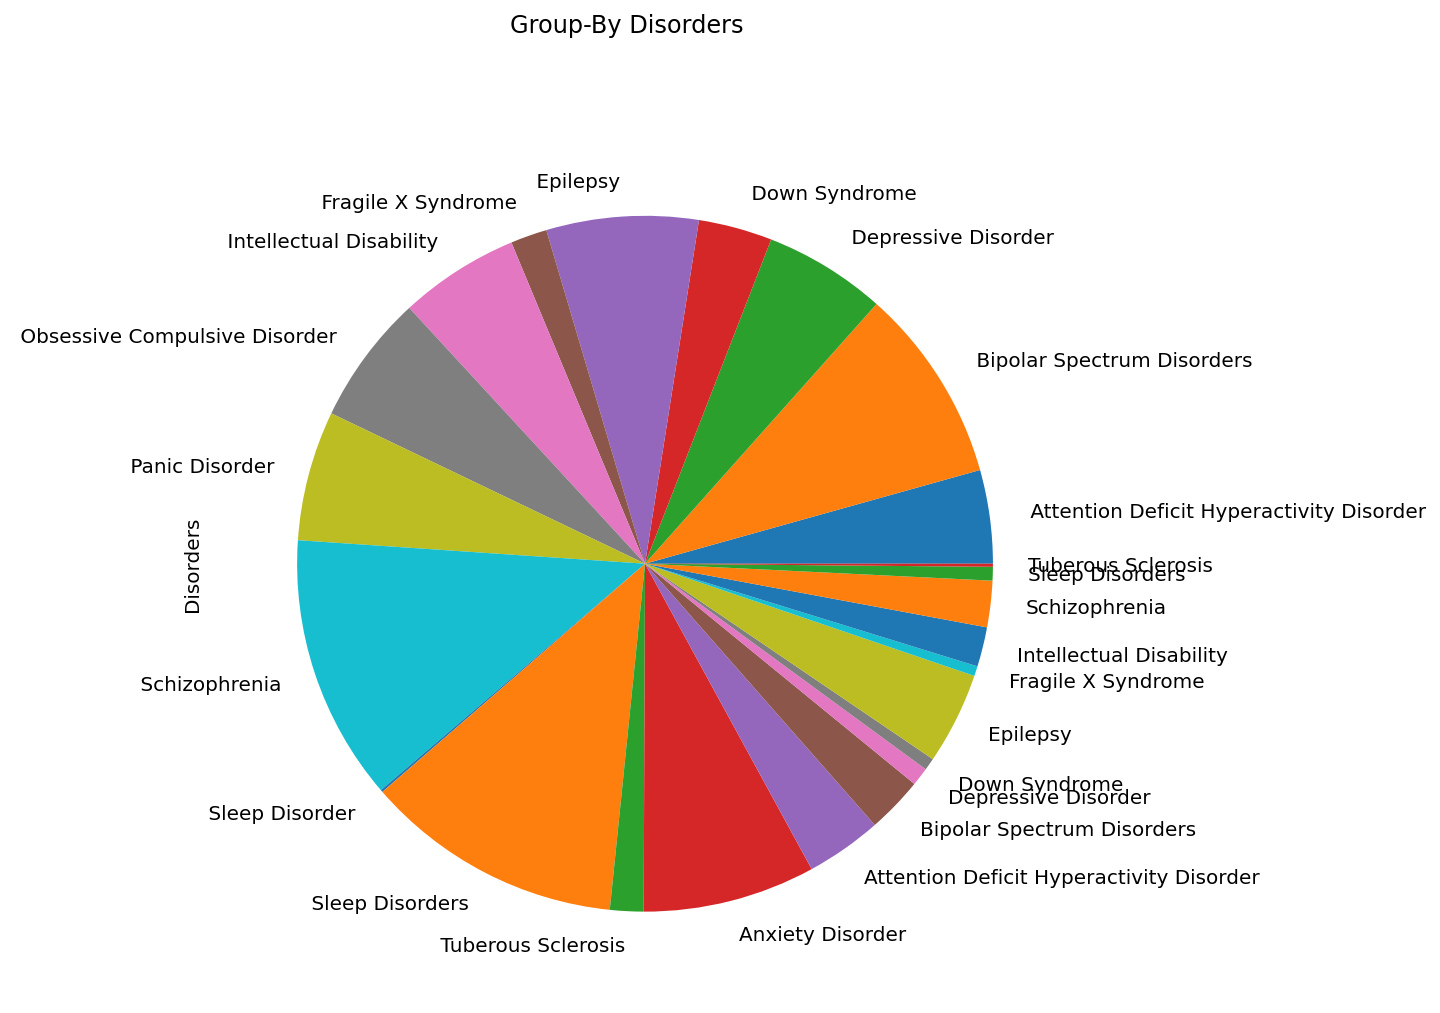

In [84]:
dfdisorders.groupby('Disorders')['Disorders'].agg('count').plot(kind='pie',title='Group-By Disorders',subplots=True, figsize=(10,8))

In [85]:
dfdisorders.head(30)

,MDAG,Disorders
0,APOE,Anxiety Disorder
0,APOE,Attention Deficit Hyperactivity Disorder
0,APOE,Bipolar Spectrum Disorders
0,APOE,Depressive Disorder
0,APOE,Down Syndrome
...,...,...
2,SLC6A4,Attention Deficit Hyperactivity Disorder
2,SLC6A4,Bipolar Spectrum Disorders
2,SLC6A4,Depressive Disorder
2,SLC6A4,Down Syndrome


mergegenddisorderspath.

In [ ]:
mod_dfdisorders.plot.pie

In [87]:
df.head(3)

,gene-symbol,gene-name,ensembl-id,chromosome,gene-score,MDAG,Disorders,Path,Gene,NumberInPath,PathwayNumber,Disordercount
0,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Anxiety Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0,16.0
2,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Attention Deficit Hyperactivity Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0,16.0
4,ADA,adenosine deaminase,ENSG00000196839,20,2.0,ADA,Bipolar Spectrum Disorders,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0,16.0


In [ ]:
df.groupby('Path')['Disorders'].agg('count').plot(kind='bar',title='Group-By Pathways/Disorder')

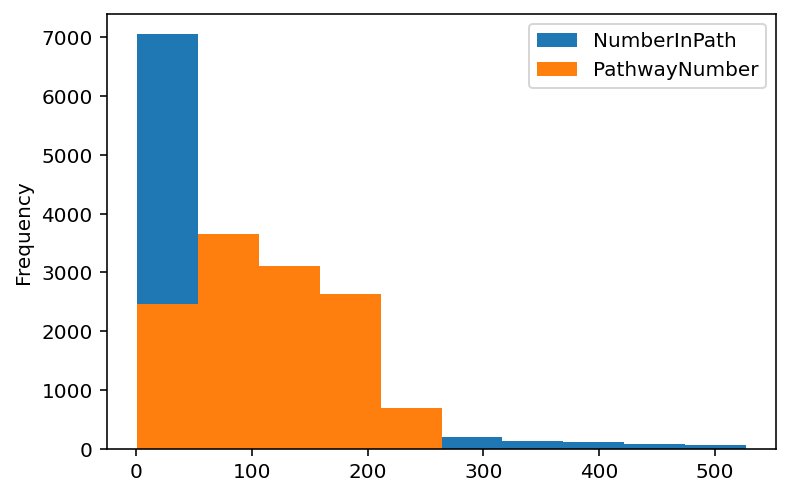

In [89]:
mod_dfpaths.plot.hist()

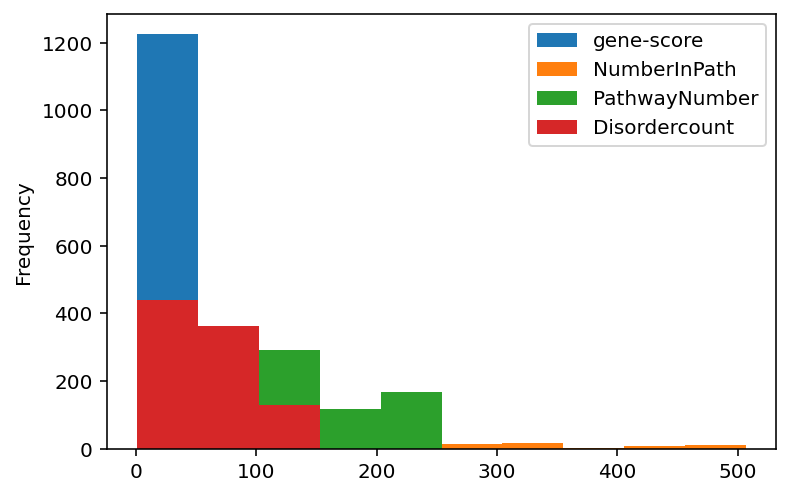

In [90]:
mergegenddisorderspath.plot.hist()

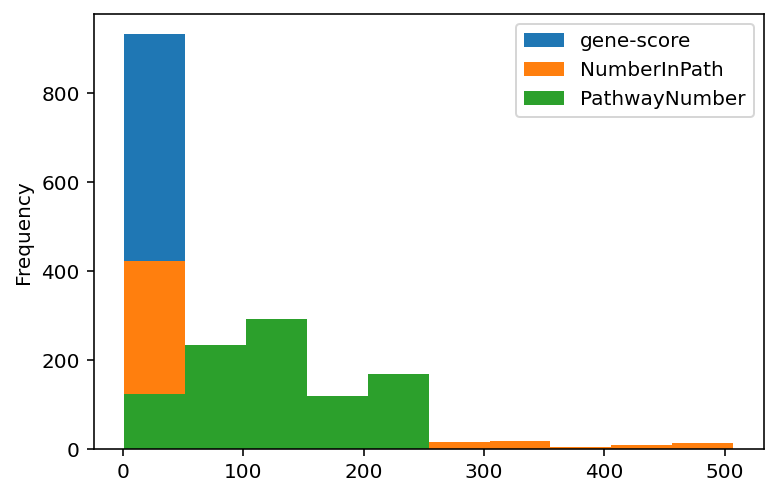

In [91]:
dfdatanew.plot.hist()

In [92]:
mod_dfpaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12539 entries, 3435 to 5624
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Path           12539 non-null  object
 1   Gene           12539 non-null  object
 2   NumberInPath   12539 non-null  int64 
 3   PathwayNumber  12539 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 489.8+ KB


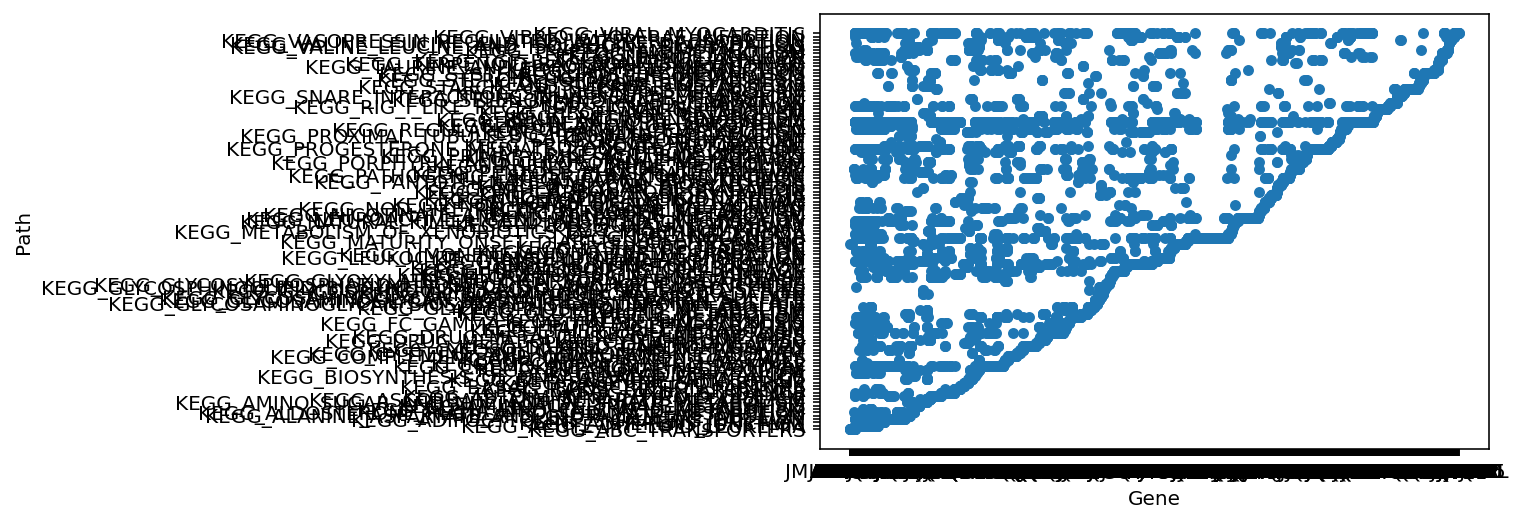

In [93]:
mod_dfpaths.plot.scatter(x='Gene',y='Path')

In [94]:
mergegenddisorderspath.columns

Index(['gene-symbol', 'gene-name', 'ensembl-id', 'chromosome', 'gene-score',
       'MDAG', 'Disorders', 'Path', 'Gene', 'NumberInPath', 'PathwayNumber',
       'Disordercount'],
      dtype='object')

In [95]:
mergegenddisorderspath.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 0 to 1223
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gene-symbol    1224 non-null   object 
 1   gene-name      1224 non-null   object 
 2   ensembl-id     1224 non-null   object 
 3   chromosome     1224 non-null   object 
 4   gene-score     1224 non-null   float64
 5   MDAG           1224 non-null   object 
 6   Disorders      1224 non-null   object 
 7   Path           931 non-null    object 
 8   Gene           931 non-null    object 
 9   NumberInPath   931 non-null    float64
 10  PathwayNumber  931 non-null    float64
 11  Disordercount  931 non-null    float64
dtypes: float64(4), object(8)
memory usage: 124.3+ KB


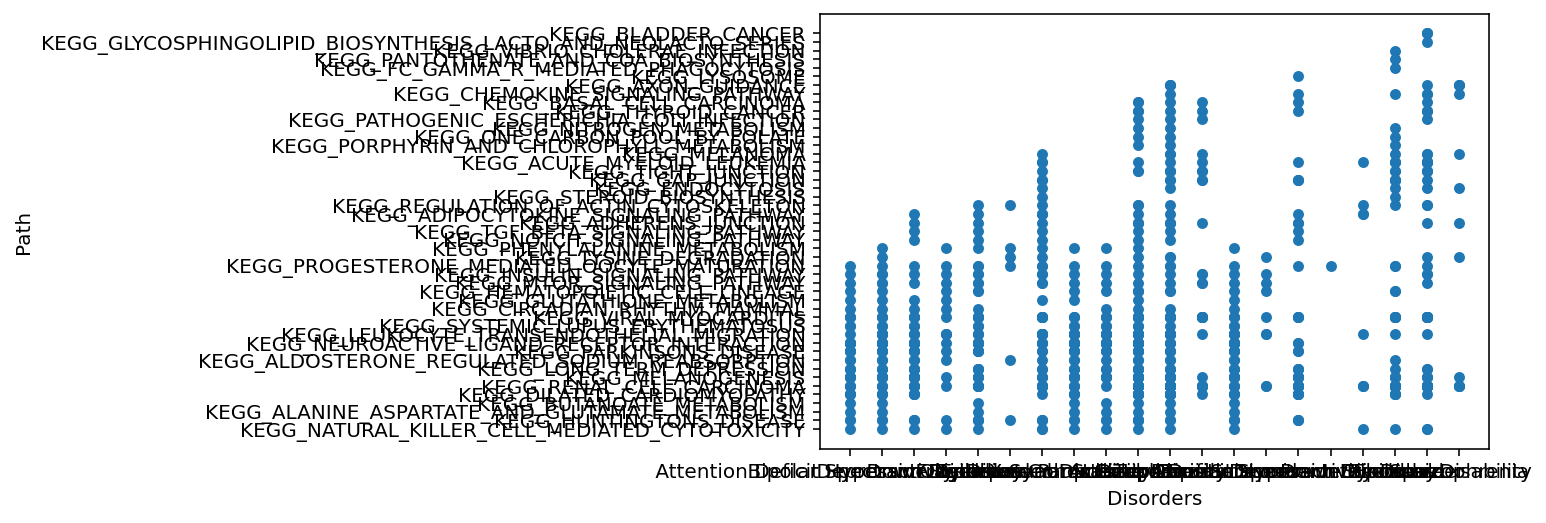

In [99]:
dfdatanew.plot.scatter(x='Disorders',y='Path')

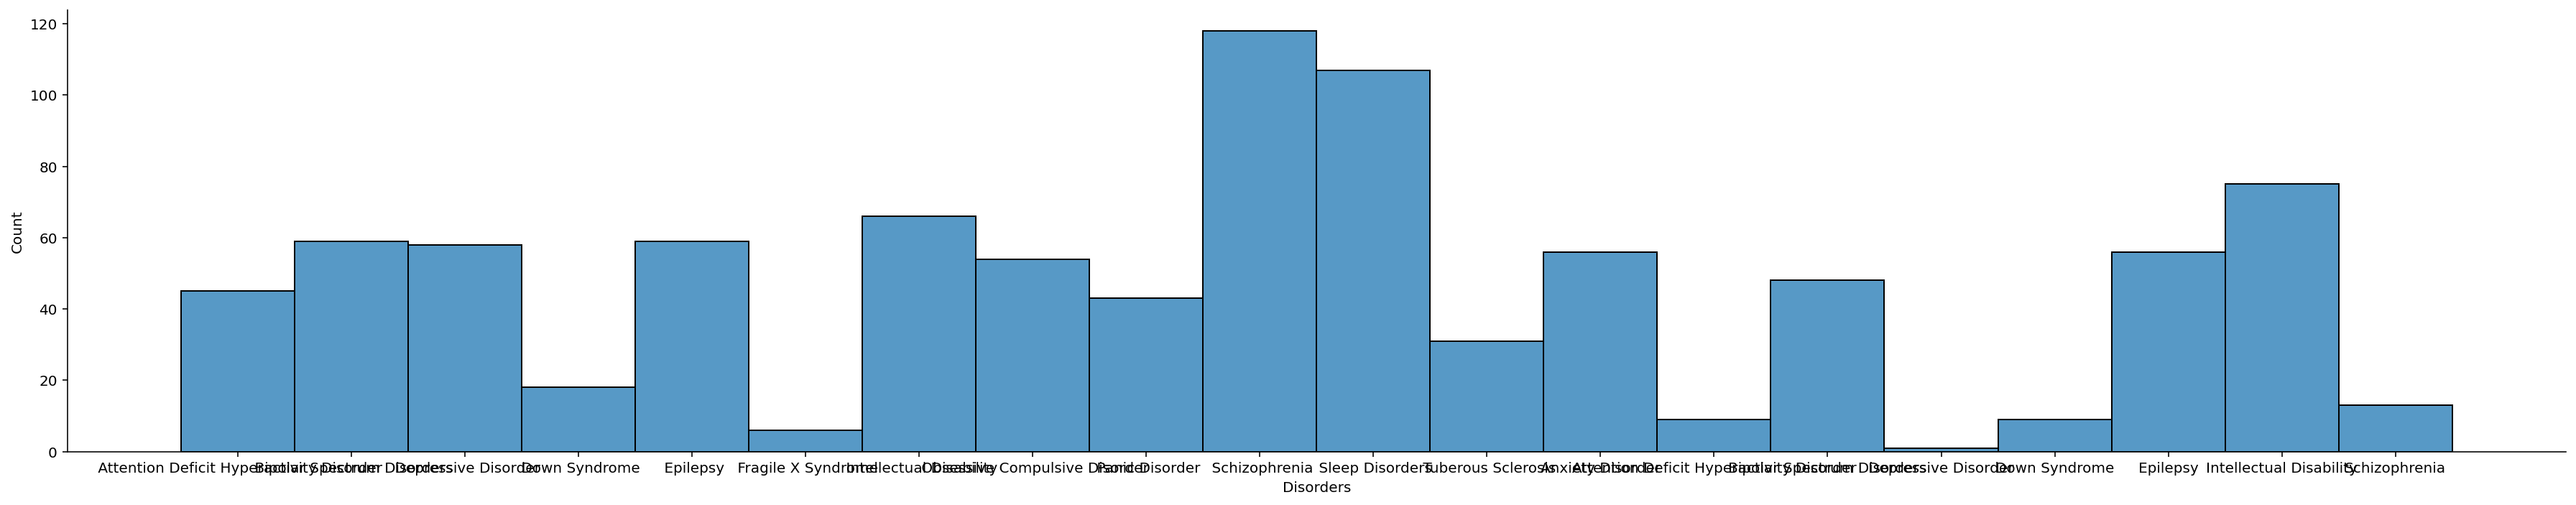

In [98]:
sns.displot(data=dfdatanew, x="Disorders", aspect=5)

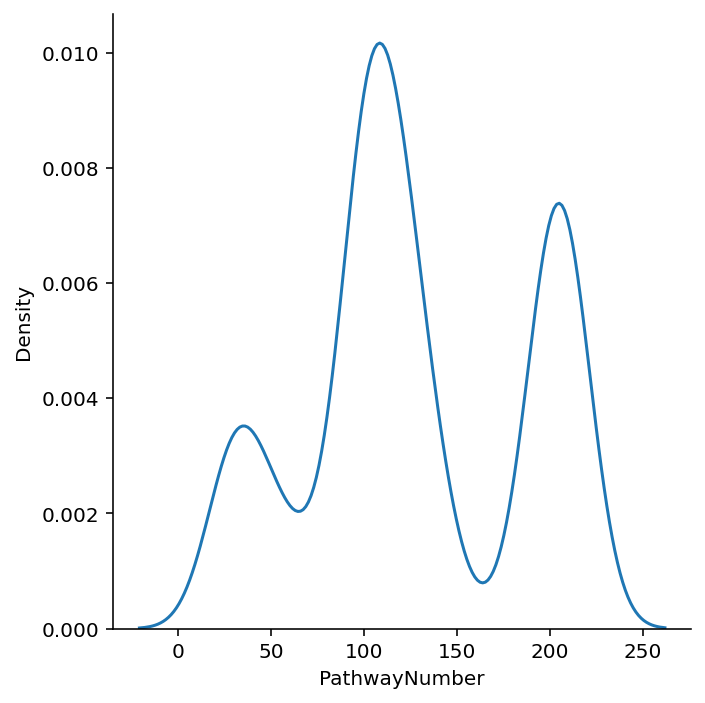

In [100]:
sns.displot(dfdatanew, x="PathwayNumber", kind="kde")

In [102]:
testd = dfdisorders.groupby(['Disorders']).agg(['count'])

In [103]:
testd = dfdisorders.groupby(['Disorders'])['Disorders'].count()

In [105]:
testd.head()

Disorders
 Attention Deficit Hyperactivity Disorder    123
 Bipolar Spectrum Disorders                  257
 Depressive Disorder                         161
 Down Syndrome                                97
 Epilepsy                                    200
Name: Disorders, dtype: int64

In [106]:
testd = dfdisorders.sort_values(by=['MDAG'],ascending=[False])

In [108]:
display(testd)

,MDAG,Disorders
200,ZNF804A,Anxiety Disorder
200,ZNF804A,Schizophrenia
200,ZNF804A,Down Syndrome
200,ZNF804A,Depressive Disorder
200,ZNF804A,Bipolar Spectrum Disorders
...,...,...
67,AANAT,Bipolar Spectrum Disorders
67,AANAT,Attention Deficit Hyperactivity Disorder
67,AANAT,Anxiety Disorder
67,AANAT,Sleep Disorders


In [109]:
dfdisorders.index

Int64Index([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            ...
            700, 701, 702, 703, 704, 705, 706, 707, 708, 709],
           dtype='int64', length=2833)

In [111]:
display(testd)

,MDAG,Disorders
200,ZNF804A,Anxiety Disorder
200,ZNF804A,Schizophrenia
200,ZNF804A,Down Syndrome
200,ZNF804A,Depressive Disorder
200,ZNF804A,Bipolar Spectrum Disorders
...,...,...
67,AANAT,Bipolar Spectrum Disorders
67,AANAT,Attention Deficit Hyperactivity Disorder
67,AANAT,Anxiety Disorder
67,AANAT,Sleep Disorders


In [112]:
print (test.columns)

MultiIndex([(    'gene-name', 'count'),
            (   'ensembl-id', 'count'),
            (   'chromosome', 'count'),
            (   'gene-score', 'count'),
            (    'Disorders', 'count'),
            (         'Gene', 'count'),
            ( 'NumberInPath', 'count'),
            ('PathwayNumber', 'count')],
           )


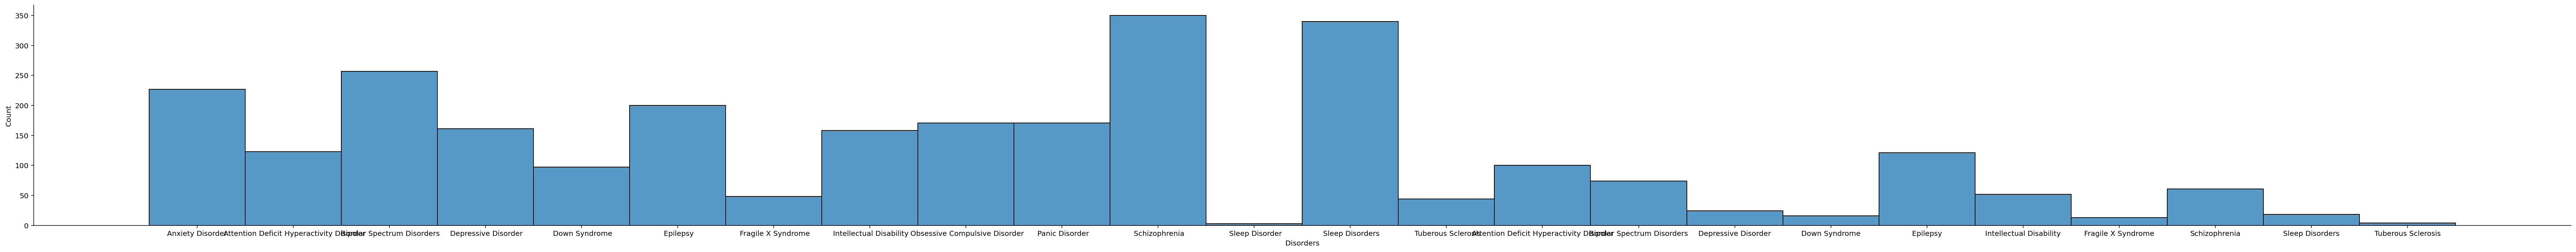

In [113]:
sns.displot(data=dfdisorders, x="Disorders", aspect=10)

# **THIS IS FROM THE GREAT VIDEO SERIES sentdex Data Anlysis Panda**

In [114]:
Create new df with  selection:
dfregions = df[df['region']] == "Whatever"]
dfregions.head(30)
dfregions.index()
To reassign:
dfregions = dfegions.set_index("whatever")
To mofigy existing:
dfregions = dfegions.set_index("whatever", inplace=True)
plot immediate dataset as is
dfregions.plot()
dfregions['Whatever'].plot()

SyntaxError: ignored

In [115]:
dfdatanew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 1218
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gene-name      931 non-null    object 
 1   ensembl-id     931 non-null    object 
 2   chromosome     931 non-null    object 
 3   gene-score     931 non-null    float64
 4   Disorders      931 non-null    object 
 5   Path           931 non-null    object 
 6   Gene           931 non-null    object 
 7   NumberInPath   931 non-null    float64
 8   PathwayNumber  931 non-null    float64
dtypes: float64(3), object(6)
memory usage: 72.7+ KB


In [116]:
sorted(dfdatanew.Disorders.unique())

[' Attention Deficit Hyperactivity Disorder',
 ' Bipolar Spectrum Disorders',
 ' Depressive Disorder',
 ' Down Syndrome',
 ' Epilepsy',
 ' Fragile X Syndrome',
 ' Intellectual Disability',
 ' Obsessive Compulsive Disorder',
 ' Panic Disorder',
 ' Schizophrenia',
 ' Sleep Disorders',
 ' Tuberous Sclerosis',
 'Anxiety Disorder',
 'Attention Deficit Hyperactivity Disorder',
 'Bipolar Spectrum Disorders',
 'Depressive Disorder',
 'Down Syndrome',
 'Epilepsy',
 'Intellectual Disability',
 'Schizophrenia']

In [117]:
dfdatanew['Disorders']=dfdatanew.Disorders.astype('category')

In [118]:
dfdatanew.dtypes

gene-name          object
ensembl-id         object
chromosome         object
gene-score        float64
Disorders        category
Path               object
Gene               object
NumberInPath      float64
PathwayNumber     float64
dtype: object

In [119]:
dfdatanew.Disorders.head()

0     Attention Deficit Hyperactivity Disorder
1     Attention Deficit Hyperactivity Disorder
2     Attention Deficit Hyperactivity Disorder
3     Attention Deficit Hyperactivity Disorder
7     Attention Deficit Hyperactivity Disorder
Name: Disorders, dtype: category
Categories (20, object): [' Attention Deficit Hyperactivity Disorder', ' Bipolar Spectrum Disorders', ' Depressive Disorder',
                          ' Down Syndrome', ..., 'Down Syndrome', 'Epilepsy',
                          'Intellectual Disability', 'Schizophrenia']

In [120]:
dfdatanew.Disorders.cat.codes.head()

0    0
1    0
2    0
3    0
7    0
dtype: int8

In [121]:
display(dfdisorders)

,MDAG,Disorders
0,APOE,Anxiety Disorder
0,APOE,Attention Deficit Hyperactivity Disorder
0,APOE,Bipolar Spectrum Disorders
0,APOE,Depressive Disorder
0,APOE,Down Syndrome
...,...,...
705,USP9X,Intellectual Disability
706,WNK3,Intellectual Disability
707,XIRP2,Epilepsy
708,XPO1,Intellectual Disability


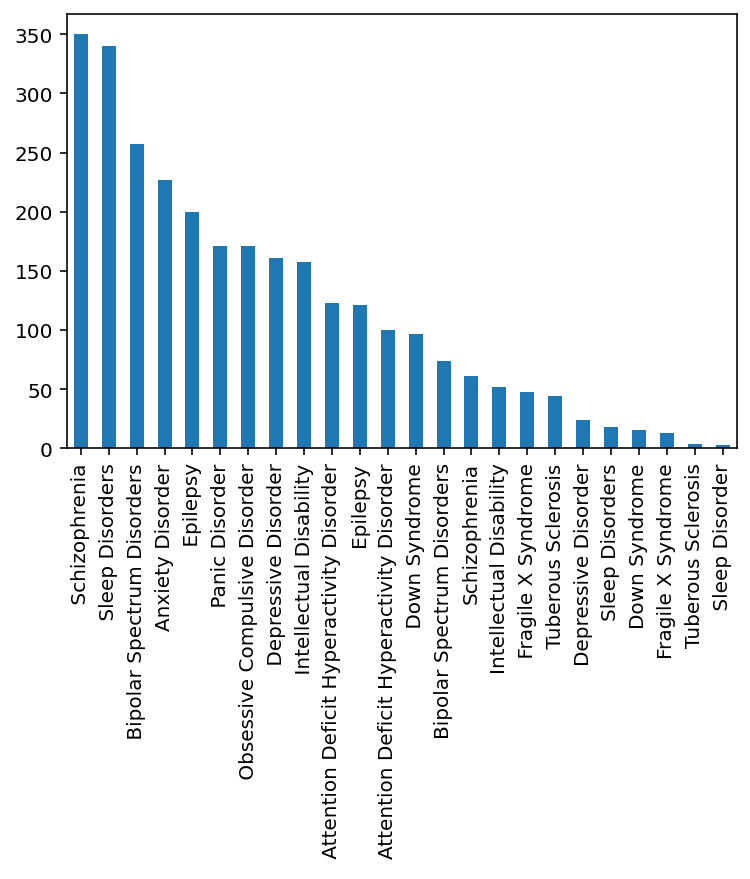

In [123]:
dfdisorders['Disorders'].value_counts().plot(kind='bar')

mod_dfpaths = readdfclpath.sort_values(by=['Path', 'Gene'])

In [124]:
mod_dfpaths.corr()

,NumberInPath,PathwayNumber
NumberInPath,1.000000,0.227189
PathwayNumber,0.227189,1.000000


In [125]:
mod_dfpaths.tail(4)

,Path,Gene,NumberInPath,PathwayNumber
11612,KEGG_VIRAL_MYOCARDITIS,VEGFC,45,209
11623,KEGG_VIRAL_MYOCARDITIS,VEGFD,56,209
12180,KEGG_VIRAL_MYOCARDITIS,XIAP,10,217
5624,KEGG_VIRAL_MYOCARDITIS,ZMAT3,9,102


# **** Plot Pathways Data with # of Genes per Pathway*** 

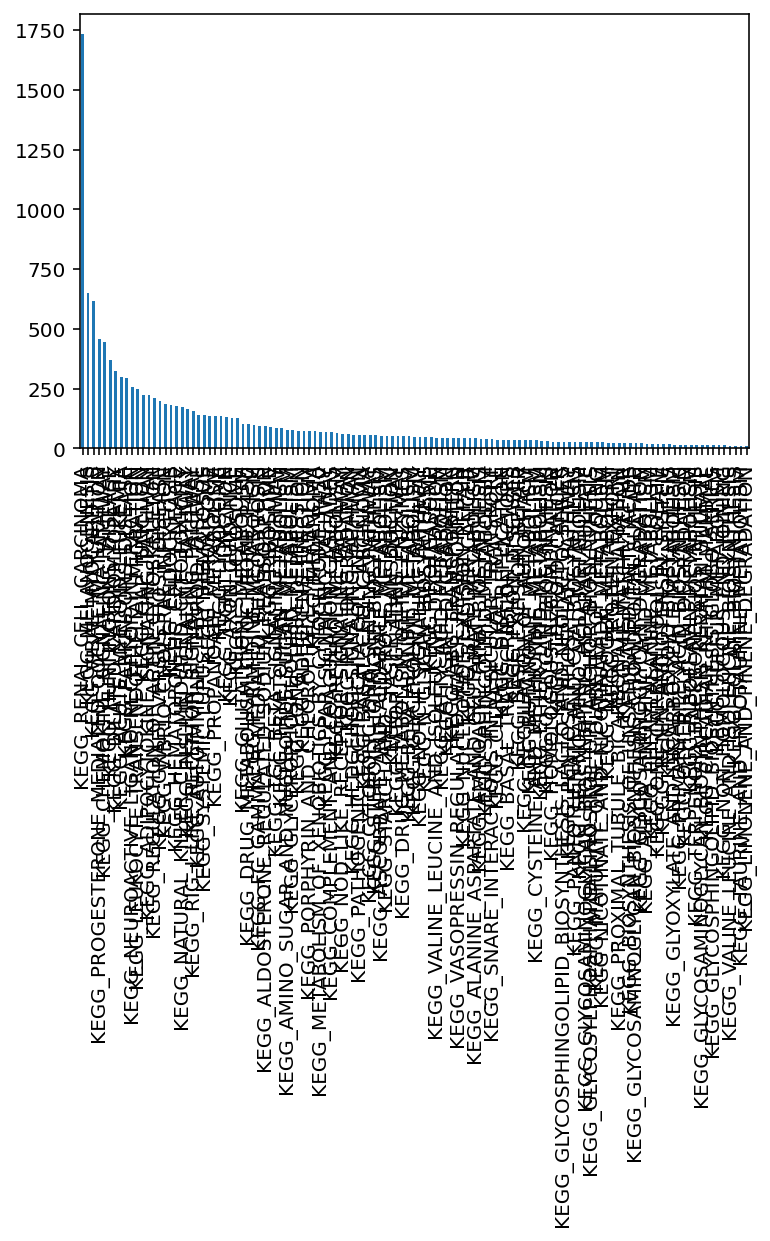

In [126]:
mod_dfpaths['Path'].value_counts().plot(kind='bar')

In [132]:
dfdisorders.loc[dfdisorders['Disorders'] == 'Sleep Disorder']

,MDAG,Disorders


In [133]:
dfdisorders.loc[dfdisorders['MDAG'] == 'SLC6A4']

,MDAG,Disorders
2,SLC6A4,Anxiety Disorder
2,SLC6A4,Attention Deficit Hyperactivity Disorder
2,SLC6A4,Bipolar Spectrum Disorders
2,SLC6A4,Depressive Disorder
2,SLC6A4,Down Syndrome
...,...,...
2,SLC6A4,Intellectual Disability
2,SLC6A4,Obsessive Compulsive Disorder
2,SLC6A4,Panic Disorder
2,SLC6A4,Schizophrenia


Get Rid of space in first position - works great!!

In [134]:
dfdisorders['Disorders'] = dfdisorders['Disorders'].str.strip() 

In [135]:
#print(dfdisorders.loc[dfdisorders['Disorders'] == ' Sleep Disorder'])
#dfdisorders.set_index("Disorders", inplace=True)
#print(dfdisorders.loc[['Sleep Disorder', 'Sleep Disorders']])
dfdisorders.loc[(dfdisorders.Disorders == 'Sleep Disorder'),'Disorders']='Sleep Disorders'

In [136]:
display(dfdisorders)

,MDAG,Disorders
0,APOE,Anxiety Disorder
0,APOE,Attention Deficit Hyperactivity Disorder
0,APOE,Bipolar Spectrum Disorders
0,APOE,Depressive Disorder
0,APOE,Down Syndrome
...,...,...
705,USP9X,Intellectual Disability
706,WNK3,Intellectual Disability
707,XIRP2,Epilepsy
708,XPO1,Intellectual Disability


In [137]:
# making boolean series for a team nam# making boolean series for a team name
filter1 = dfdisorders["Disorders"]=="Sleep Disorder"
testingfilter=dfdisorders.where(filter1, inplace = True)
print(testingfilter)

None


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


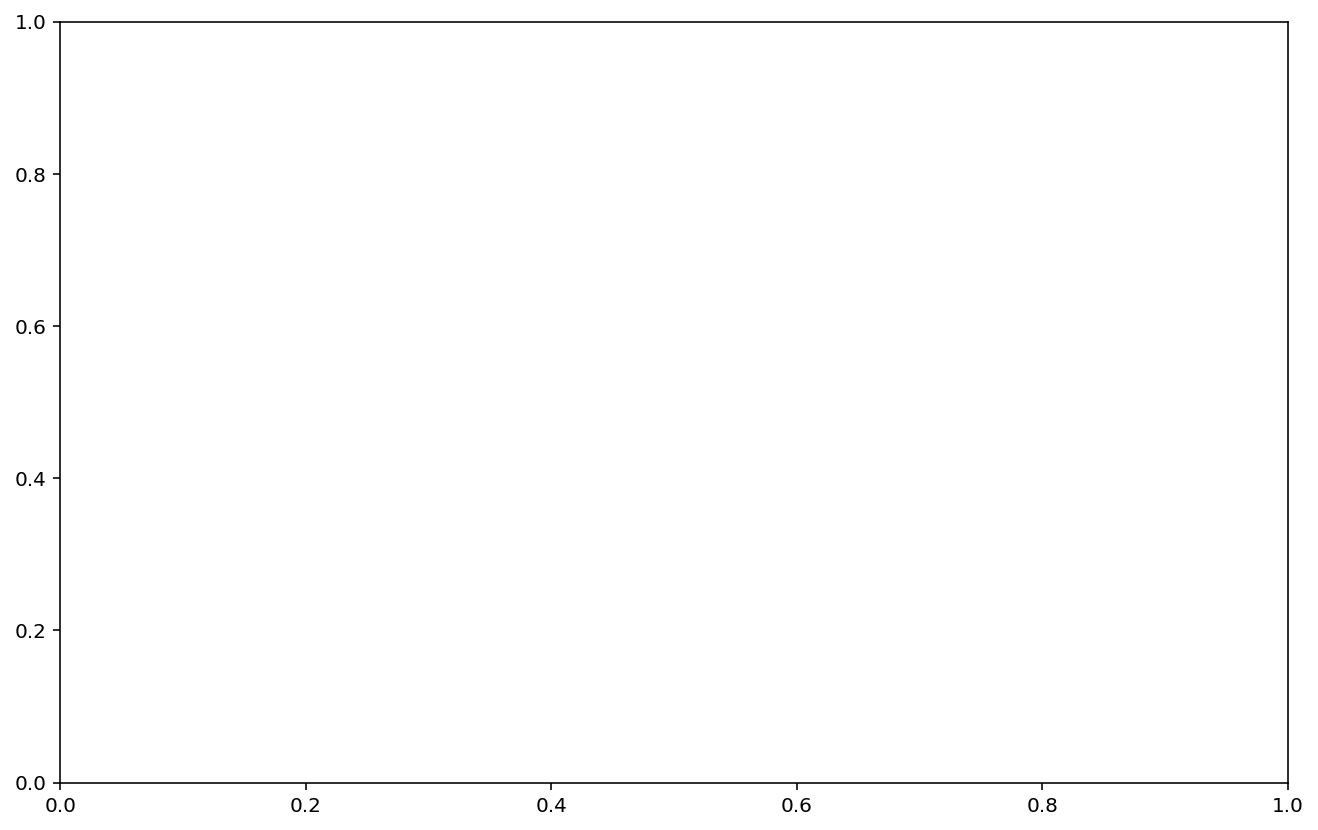

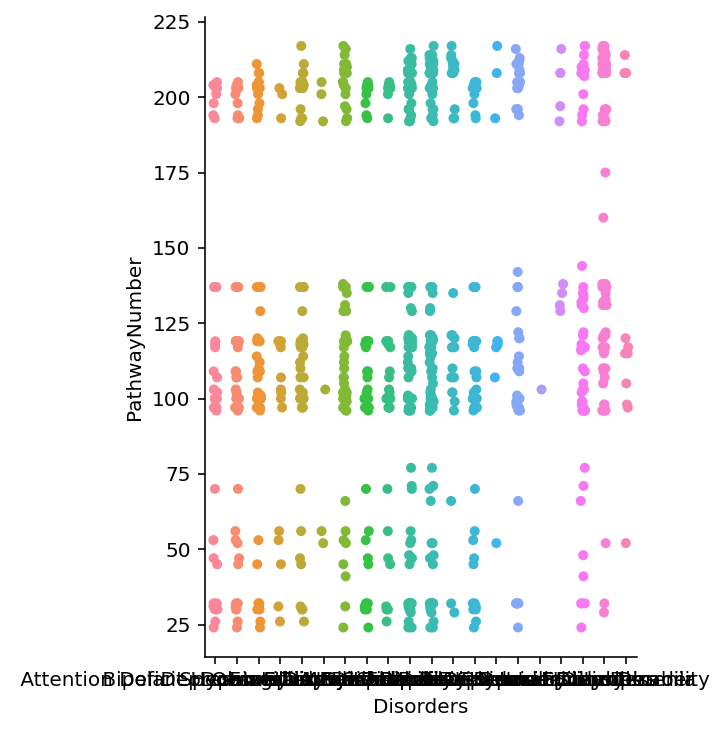

In [139]:
fig, scatter = plt.subplots(figsize = (11,7))
sns.catplot('Disorders','PathwayNumber',data=dfdatanew)

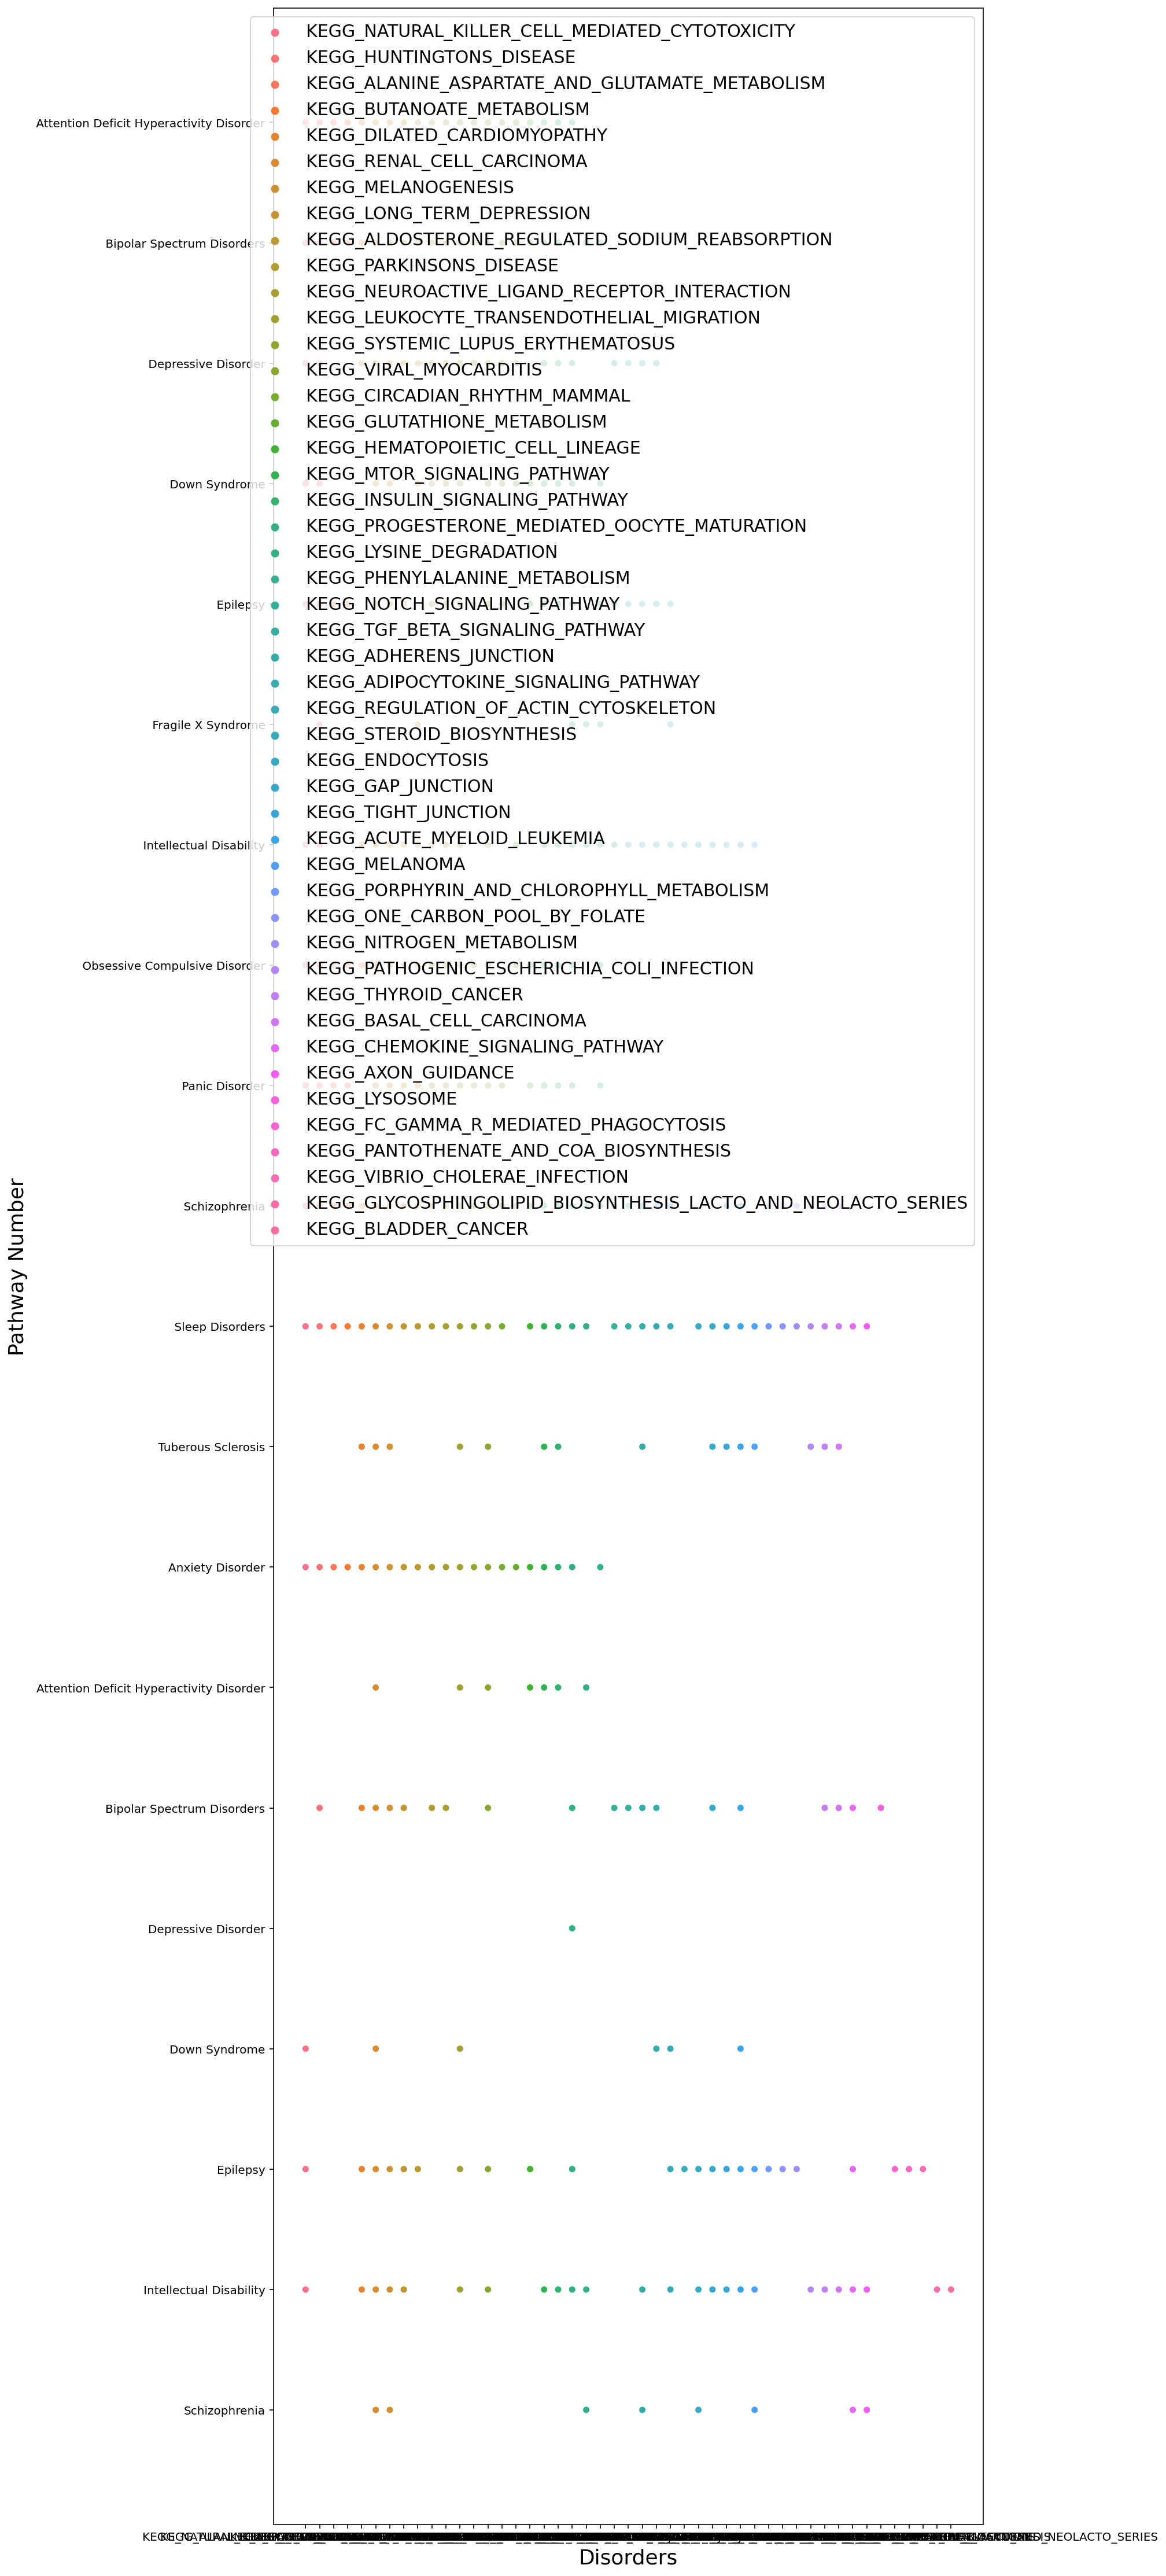

In [140]:
fig, scatter = plt.subplots(figsize = (11,40))
scatter = sns.scatterplot(x = 'Path', y ='Disorders', data=dfdatanew, hue='Path', )
scatter.set_xlabel('Disorders', fontsize = 18)
scatter.set_ylabel ('Pathway Number', fontsize = 18)
scatter.legend(loc='upper right', fontsize = 15);


In [141]:
pd.set_option('display.max_rows', 100)

In [142]:
display(dfdatanew)

,gene-name,ensembl-id,chromosome,gene-score,Disorders,Path,Gene,NumberInPath,PathwayNumber
0,adenosine deaminase,ENSG00000196839,20,2.0,Attention Deficit Hyperactivity Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0
1,adenosine deaminase,ENSG00000196839,20,2.0,Attention Deficit Hyperactivity Disorder,KEGG_HUNTINGTONS_DISEASE,ADA,71.0,45.0
2,"aldehyde dehydrogenase 5 family, member A1 (su...",ENSG00000112294,6,1.0,Attention Deficit Hyperactivity Disorder,KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,ALDH5A1,28.0,47.0
3,"aldehyde dehydrogenase 5 family, member A1 (su...",ENSG00000112294,6,1.0,Attention Deficit Hyperactivity Disorder,KEGG_BUTANOATE_METABOLISM,ALDH5A1,29.0,70.0
7,"calcium channel, voltage-dependent, L type, al...",ENSG00000151067,12,1.0,Attention Deficit Hyperactivity Disorder,KEGG_DILATED_CARDIOMYOPATHY,CACNA1C,39.0,24.0
...,...,...,...,...,...,...,...,...,...
1210,met proto-oncogene (hepatocyte growth factor r...,ENSG00000105976,7,2.0,Schizophrenia,KEGG_RENAL_CELL_CARCINOMA,MET,507.0,208.0
1211,met proto-oncogene (hepatocyte growth factor r...,ENSG00000105976,7,2.0,Schizophrenia,KEGG_MELANOMA,MET,51.0,214.0
1216,roundabout guidance receptor 2,ENSG00000185008,3,2.0,Schizophrenia,KEGG_AXON_GUIDANCE,ROBO2,16.0,115.0
1217,"sema domain, seven thrombospondin repeats (typ...",ENSG00000112902,5,2.0,Schizophrenia,KEGG_AXON_GUIDANCE,SEMA5A,58.0,115.0


In [143]:
test = dfdatanew[dfdatanew.NumberInPath < 20.0]


In [144]:
display(test)

,gene-name,ensembl-id,chromosome,gene-score,Disorders,Path,Gene,NumberInPath,PathwayNumber
0,adenosine deaminase,ENSG00000196839,20,2.0,Attention Deficit Hyperactivity Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0
32,"glutamate receptor, ionotropic, N-methyl D-asp...",ENSG00000183454,16,2.0,Attention Deficit Hyperactivity Disorder,KEGG_VIRAL_MYOCARDITIS,GRIN2A,13.0,204.0
37,"glutamate receptor, inotropic, N-methyl D-apar...",ENSG00000273079,12,1.0,Attention Deficit Hyperactivity Disorder,KEGG_VIRAL_MYOCARDITIS,GRIN2B,15.0,204.0
39,"Nuclear receptor subfamily 3, group C, member 2",ENSG00000151623,4,1.0,Attention Deficit Hyperactivity Disorder,KEGG_ALDOSTERONE_REGULATED_SODIUM_REABSORPTION,NR3C2,3.0,201.0
40,oxytocin receptor,ENSG00000180914,3,2.0,Attention Deficit Hyperactivity Disorder,KEGG_MELANOGENESIS,OXTR,9.0,97.0
...,...,...,...,...,...,...,...,...,...
1154,catenin beta 1,ENSG00000168036,3,1.0,Intellectual Disability,KEGG_THYROID_CANCER,CTNNB1,7.0,212.0
1173,v-Ha-ras Harvey rat sarcoma viral oncogene hom...,ENSG00000174775,11,1.0,Intellectual Disability,KEGG_BLADDER_CANCER,HRAS,1.0,175.0
1183,v-Ha-ras Harvey rat sarcoma viral oncogene hom...,ENSG00000174775,11,1.0,Intellectual Disability,KEGG_THYROID_CANCER,HRAS,2.0,212.0
1185,v-Ha-ras Harvey rat sarcoma viral oncogene hom...,ENSG00000174775,11,1.0,Intellectual Disability,KEGG_BLADDER_CANCER,HRAS,1.0,215.0


In [145]:
sortdisorders = dfdatanew.sort_values(by=['Disorders'], inplace=True)

In [146]:
display(test)

,gene-name,ensembl-id,chromosome,gene-score,Disorders,Path,Gene,NumberInPath,PathwayNumber
0,adenosine deaminase,ENSG00000196839,20,2.0,Attention Deficit Hyperactivity Disorder,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,ADA,15.0,31.0
32,"glutamate receptor, ionotropic, N-methyl D-asp...",ENSG00000183454,16,2.0,Attention Deficit Hyperactivity Disorder,KEGG_VIRAL_MYOCARDITIS,GRIN2A,13.0,204.0
37,"glutamate receptor, inotropic, N-methyl D-apar...",ENSG00000273079,12,1.0,Attention Deficit Hyperactivity Disorder,KEGG_VIRAL_MYOCARDITIS,GRIN2B,15.0,204.0
39,"Nuclear receptor subfamily 3, group C, member 2",ENSG00000151623,4,1.0,Attention Deficit Hyperactivity Disorder,KEGG_ALDOSTERONE_REGULATED_SODIUM_REABSORPTION,NR3C2,3.0,201.0
40,oxytocin receptor,ENSG00000180914,3,2.0,Attention Deficit Hyperactivity Disorder,KEGG_MELANOGENESIS,OXTR,9.0,97.0
...,...,...,...,...,...,...,...,...,...
1154,catenin beta 1,ENSG00000168036,3,1.0,Intellectual Disability,KEGG_THYROID_CANCER,CTNNB1,7.0,212.0
1173,v-Ha-ras Harvey rat sarcoma viral oncogene hom...,ENSG00000174775,11,1.0,Intellectual Disability,KEGG_BLADDER_CANCER,HRAS,1.0,175.0
1183,v-Ha-ras Harvey rat sarcoma viral oncogene hom...,ENSG00000174775,11,1.0,Intellectual Disability,KEGG_THYROID_CANCER,HRAS,2.0,212.0
1185,v-Ha-ras Harvey rat sarcoma viral oncogene hom...,ENSG00000174775,11,1.0,Intellectual Disability,KEGG_BLADDER_CANCER,HRAS,1.0,215.0


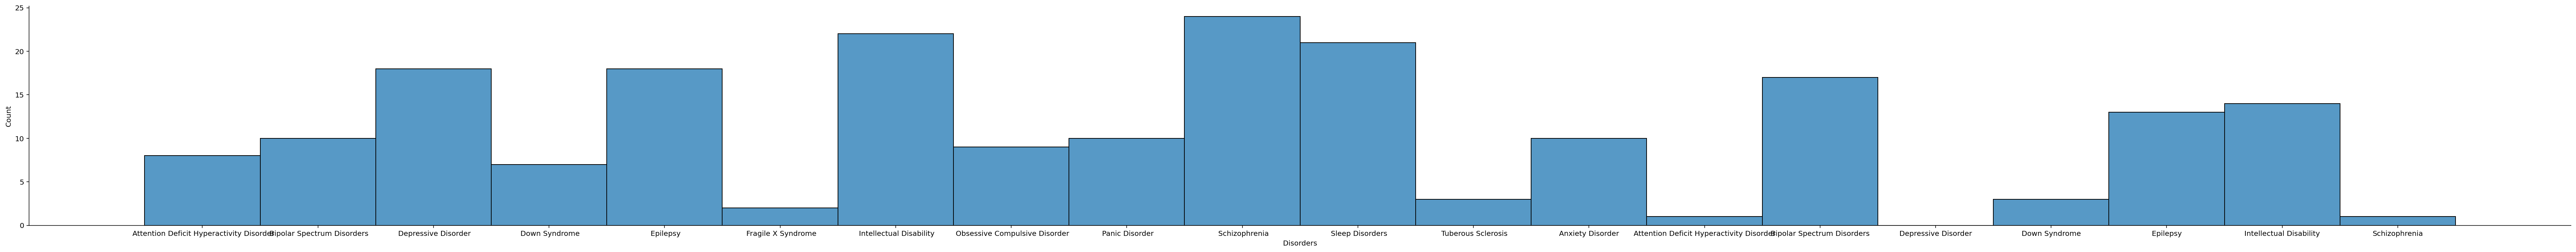

In [147]:
sns.displot(data=test, x='Disorders', aspect=10)

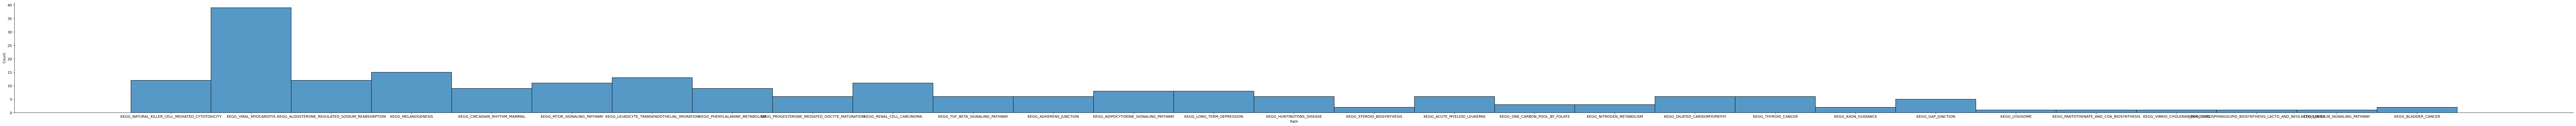

In [148]:
sns.displot(data=test, x='Path', aspect=20)